# Desafio Cientista de Dados

## Objetivo:
Fazer uma análise de um banco de dados cinematográfico para orientar qual tipo de filme deverá ser o próximo a ser produzido pelo estúdio.

## Entregas:

1- Análise exploratória dos dados, demonstrar principais características e apresentar algumas hipóteses

2- Reponder as seguintes perguntas:

   A- Qual filme seria recomendado para uma pessoa que não conheço

   B- Quais são os principais fatores que estão relacinados com alta expectativa de faturamento de um filme ?

   C- Quais insights podem ser tirados com a coluna Overview? é possível inferir o gênero do filme a partir dela?

3- Fazer a previsão da nota do IMDB a partir dos dados

  A- Quais variáveis e transformações foram utilizadas

  B- Qual tipo de problema está sendo resolvido

  C- Qual modelo melhor se aproximou dos dados, prós e contras

  D- Qual medida de performance foi escolhida

4- Com o modelo de Machine Learning treinado, avaliar qual será a nota do IMDB para um filme com essas características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

# Instruções de entrega

1- Salvar o modelo serializado em .pkl

2- Entrega através de um repositório público com os seguintes arquivos:

   A- README explicando a instalação e execução do projeto

   B- Arquivos de requisitos, pacotes e bibliotecas utilizados e as respectivas versões

   C- Relatório das análises estatísticas e exploratória em PDF,Jupyter Notebook.

   D- Códigos utilizados

   E- Arquivo .pkl do modelo

In [1]:
!pip install nltk
# Downloads necessários para NLTK


In [82]:
import pandas as pd  # Manipulação e análise de dados, especialmente com DataFrames
import numpy as np  # Operações numéricas e manipulação de arrays
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
import seaborn as sns  # Visualização de dados baseada no matplotlib, com foco em gráficos estatísticos
import missingno as msno  # Visualização de valores ausentes em datasets
from scipy.stats import skew, kurtosis  # Cálculo de assimetria e curtose em distribuições

import re  # Operações com expressões regulares
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import defaultdict
import string
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Divisão de datasets e busca de hiperparâmetros
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para avaliação de modelos preditivos
from sklearn.preprocessing import StandardScaler  # Normalização e padronização de dados
from sklearn.feature_selection import SelectKBest, f_regression  # Seleção de features com base em testes estatísticos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

import xgboost as xgb  # Implementação do algoritmo de boosting para problemas de classificação e regressão

import pickle  # Serialização de modelos

import importlib  # Importação dinâmica de módulos

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
'''
#Importação e instalação de algumas bibliotecas
# Manipulação de dados
import pandas as pd  # Manipulação e análise de dados, especialmente com DataFrames
import numpy as np  # Operações numéricas e manipulação de arrays

# Visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
import seaborn as sns  # Visualização de dados baseada no matplotlib, com foco em gráficos estatísticos
import missingno as msno  # Visualização de valores ausentes em datasets
from scipy.stats import skew, kurtosis
# Processamento de texto
import re  # Operações com expressões regulares
# Modelagem preditiva
import xgboost as xgb  # Implementação do algoritmo de boosting para problemas de classificação e regressão

# Avaliação de modelos
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para avaliação de modelos preditivos

# Seleção e transformação de features
from sklearn.preprocessing import StandardScaler  # Normalização e padronização de dados
from sklearn.feature_selection import SelectKBest, f_regression  # Seleção de features com base em testes estatísticos

# Busca de hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split  # Busca de hiperparâmetros e divisão de datasets para treinamento e teste




import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

import re
import pandas as pd


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor


import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_ab


import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb


import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


import pickle

import importlib
'''

"\n#Importação e instalação de algumas bibliotecas\n# Manipulação de dados\nimport pandas as pd  # Manipulação e análise de dados, especialmente com DataFrames\nimport numpy as np  # Operações numéricas e manipulação de arrays\n\n# Visualização de dados\nimport matplotlib.pyplot as plt  # Criação de gráficos e visualizações\nimport seaborn as sns  # Visualização de dados baseada no matplotlib, com foco em gráficos estatísticos\nimport missingno as msno  # Visualização de valores ausentes em datasets\nfrom scipy.stats import skew, kurtosis\n# Processamento de texto\nimport re  # Operações com expressões regulares\n# Modelagem preditiva\nimport xgboost as xgb  # Implementação do algoritmo de boosting para problemas de classificação e regressão\n\n# Avaliação de modelos\nfrom sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para avaliação de modelos preditivos\n\n# Seleção e transformação de features\nfrom sklearn.preprocessing import StandardScaler  # 

In [4]:
df = pd.read_csv('./drive/MyDrive/imdb.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [5]:
df.head()

Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367  134,966,411  
1  Michael Caine      2303232  534,858,444  
2   Diane Keaton      1129952   57,300,000  
3   John Fiedler       689845    4,360,000  
4  Orlando Bloom      1642758  377,845,905

Primeiras observações:

Nosso dataset contém mais features tipo object.

Há alguns valores nulos em Gross, Meta_score e Certificate.

As features Gross, Runtime e Released_Year são objects porém pondem ser convertidas para int e float com mais facilidade.

As demais features precisarão de outras abordagens.

In [6]:
df['Certificate'].unique()


array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [7]:
df['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [8]:
df['Runtime'].unique()

array(['175 min', '152 min', '202 min', '96 min', '201 min', '154 min',
       '195 min', '148 min', '139 min', '178 min', '142 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)
#Vamor remover a palavra min e converter release_year e runtime para int
print(df['Released_Year'].unique())
#Vamos encontrar se há valores não numéricos inseridos na coluna  Released_Year
no_numeric_values = df[~df['Released_Year'].str.isnumeric()]

#Como temos apenas um filme que está com o valor errado no ano de lançamento vamos preencher manualmente o ano correto


#Vamos remover o PG do ano e colocar o ano correto de lançamento
df['Released_Year'] = df['Released_Year'].str.replace('PG', '1995')
df_apollo13 = df[df['Series_Title'] == 'Apollo 13']

#Vamor remover a palavra min e converter release_year e runtime para int
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Released_Year'] = df['Released_Year'].astype(int)

['1972' '2008' '1974' '1957' '2003' '1994' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


In [10]:
df['Released_Year'].unique()

array([1972, 2008, 1974, 1957, 2003, 1994, 1993, 2010, 1999, 2001, 1966,
       2002, 1990, 1980, 1975, 2020, 2019, 2014, 1998, 1997, 1995, 1991,
       1977, 1962, 1954, 1946, 2011, 2006, 2000, 1988, 1985, 1968, 1960,
       1942, 1936, 1931, 2018, 2017, 2016, 2012, 2009, 2007, 1984, 1981,
       1979, 1971, 1963, 1964, 1950, 1940, 2013, 2005, 2004, 1992, 1987,
       1986, 1983, 1976, 1973, 1965, 1959, 1958, 1952, 1948, 1944, 1941,
       1927, 1921, 2015, 1996, 1989, 1978, 1961, 1955, 1953, 1925, 1924,
       1982, 1967, 1951, 1949, 1939, 1937, 1934, 1928, 1926, 1920, 1970,
       1969, 1956, 1947, 1945, 1930, 1938, 1935, 1933, 1932, 1922, 1943])

In [11]:
#Vamos analisar os valores na coluna Gross
df['Gross'].unique()
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('.', '').astype(float)

In [12]:
#Vamos analisar as porcentagens de valores nulos

df_null_percent = df.isnull().sum() / len(df) * 100
df_null_percent

Series_Title      0.000000
Released_Year     0.000000
Certificate      10.110110
Runtime           0.000000
Genre             0.000000
IMDB_Rating       0.000000
Overview          0.000000
Meta_score       15.715716
Director          0.000000
Star1             0.000000
Star2             0.000000
Star3             0.000000
Star4             0.000000
No_of_Votes       0.000000
Gross            16.916917
dtype: float64

In [13]:
#Vamos verificar se tem valores iguais a 0
df[df['Gross'] == 0].count
df['Certificate'].unique()
df[df['Meta_score'] ==0 ].count()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

<Axes: >

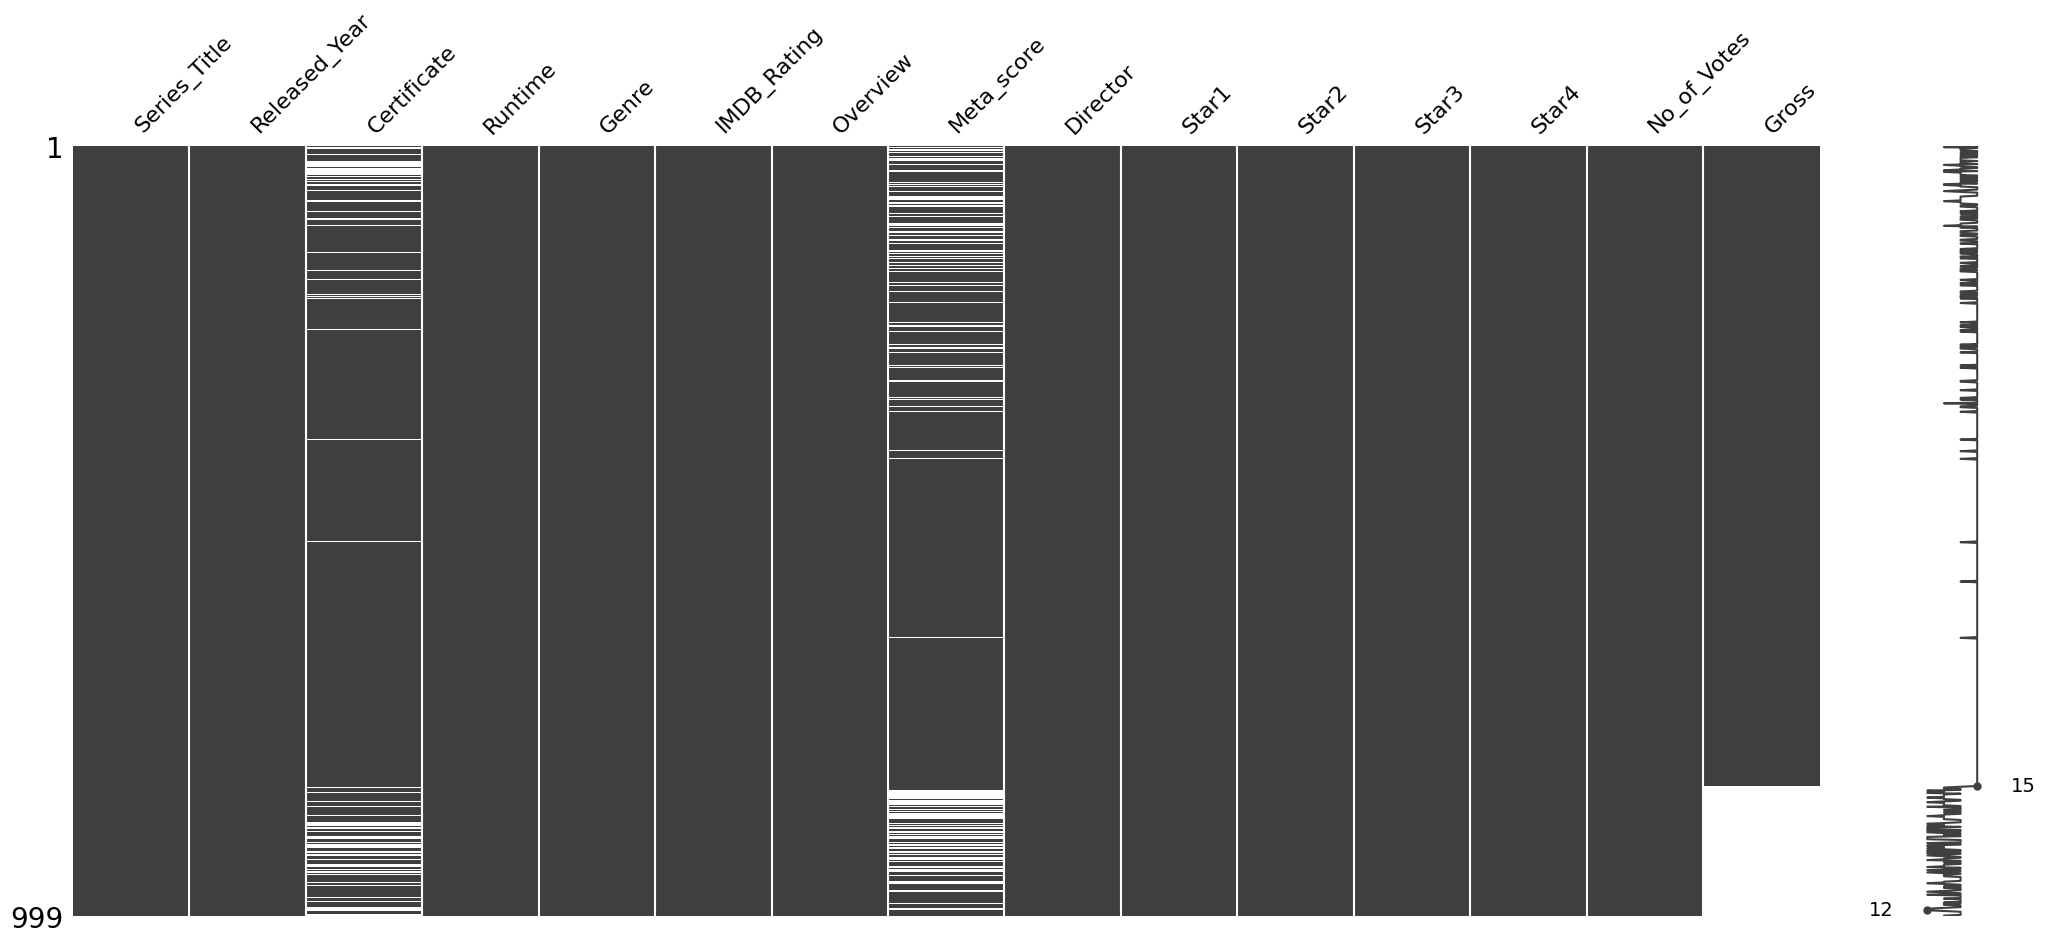

In [14]:
#Vamos analisar com uma matriz os valores nulos com relação aos valores nulos em Gross
null = df.sort_values(by=['Gross'])
msno.matrix(null)

In [15]:

null_counts = df[['Gross', 'Meta_score', 'Certificate']].isna().any(axis=1).sum()
print("Número de linhas com valores faltantes em Gross, Meta_score e Certificate:", null_counts)
total_rows = len(df)
percentage = (null_counts / total_rows) * 100
print("Porcentagem de linhas com valores faltantes em Gross, Meta_score e Certificate:", percentage)

Número de linhas com valores faltantes em Gross, Meta_score e Certificate: 286
Porcentagem de linhas com valores faltantes em Gross, Meta_score e Certificate: 28.628628628628626


Notamos uma forte correlação dos dados faltantes na feature Gross, certificate e Meta_score

Temos 28% de valores de ao menos um valor faltante. Vamos verificar qual será a melhor abordagem, dropar ou fazer input data.


Vamos dividir o data set em numéricos e categoricos para começar algumas manipulações dos dados para ter fazer uma análise exploratória


In [16]:
df_numerical = df.select_dtypes(include=['number'])
df_categorics = df.select_dtypes(include=['object'])

In [17]:
df_drop = df.copy()
df_drop.dropna(inplace=True)

In [18]:
df_numerical_features = df_drop.select_dtypes(include=['number'])
categorics = df_drop.select_dtypes(include=['object'])

In [19]:
df_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 996
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  713 non-null    int64  
 1   Runtime        713 non-null    int64  
 2   IMDB_Rating    713 non-null    float64
 3   Meta_score     713 non-null    float64
 4   No_of_Votes    713 non-null    int64  
 5   Gross          713 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 39.0 KB


<Axes: title={'center': 'Correlação das features dropando nulos'}>

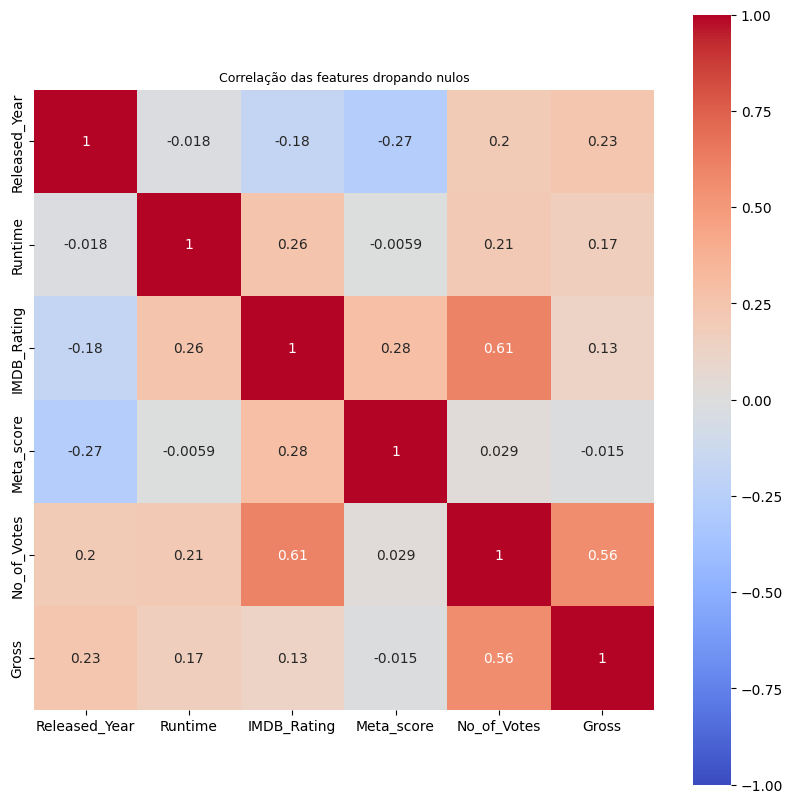

In [20]:
correlation_without_input = df_numerical_features.corr()
correlation_without_input['Gross'].sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlação das features dropando nulos', y=1,size=9)
sns.heatmap(correlation_without_input,
            square = True,
            vmin = -1.0,
            vmax=1.0,
            cmap = 'coolwarm',
            annot=True)

<Axes: title={'center': 'Correlação das features input da média'}>

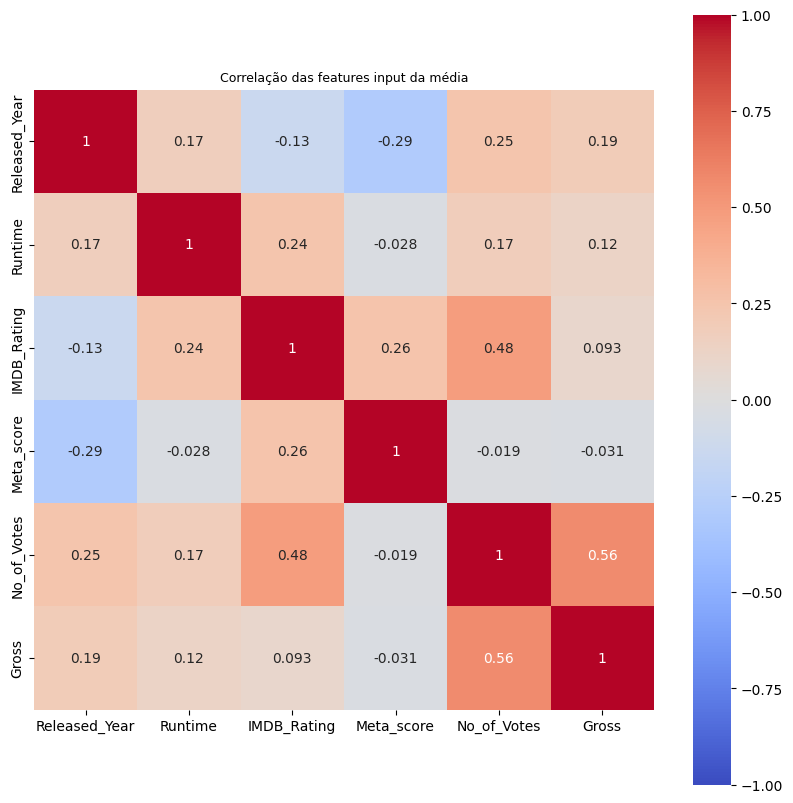

In [21]:
#vamos fazer uma cópria de DF para inputar a média
df_mean = df_numerical.copy()

# Vamos Calcular a moda da feature certificate
#df_certificate_mode = df_mean['Certificate'].mode()
#Vamos calcular a media de Gross e Meta_score
df_gross_mean = df_mean['Gross'].mean()
df_meta_mean = df_mean['Meta_score'].mean()
#Vamos preencher valores nulos de gross e meta_score pela media
df_mean['Gross'] = df_mean['Gross'].fillna(df_gross_mean)
df_mean['Meta_score'] = df_mean['Meta_score'].fillna(df_meta_mean)


numerical_features_mean = df_mean.select_dtypes(include=['number'])

correlation_mean = numerical_features_mean.corr()
correlation_mean['Gross'].sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlação das features input da média', y=1,size=9)
sns.heatmap(correlation_mean,
            square = True,
            vmin = -1.0,
            vmax=1.0,
            cmap = 'coolwarm',
            annot=True)

23457439.5
79.0


<Axes: title={'center': 'Correlação das features Input da mediana'}>

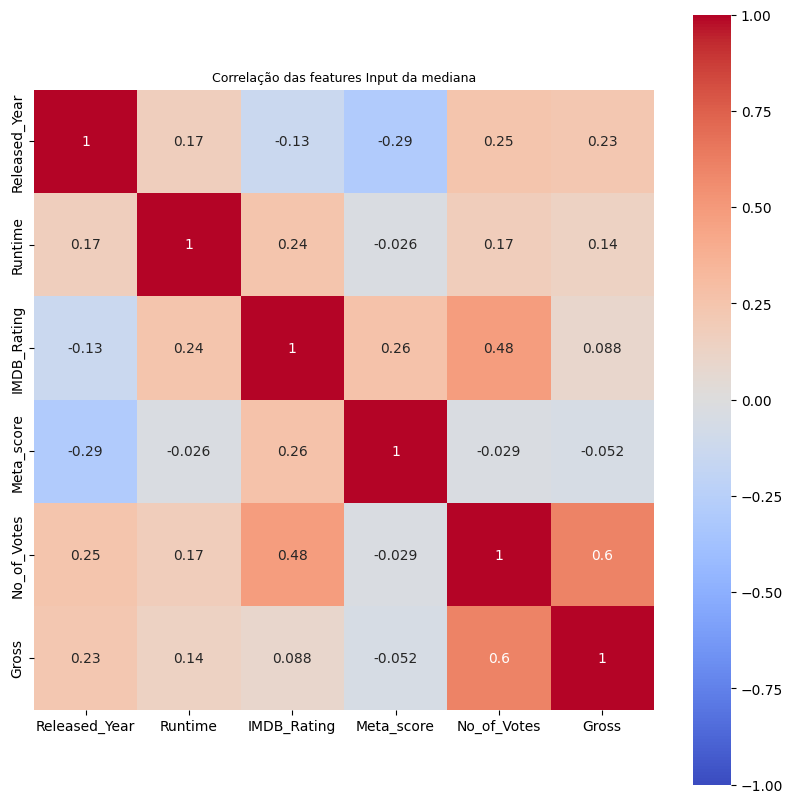

In [22]:
#vamos fazer uma cópria de DF para inputar a mediana
df_median = df_numerical.copy()

df_gross_median = df_median['Gross'].median()
df_meta_median = df_median['Meta_score'].median()


print(df_gross_median)
print(df_meta_median)
#Vamos preencher valores nulos de gross e meta_score pela mediana
df_median['Gross'] = df_median['Gross'].fillna(df_gross_median)
df_median['Meta_score'] = df_median['Meta_score'].fillna(df_meta_median)

numerical_features_median = df_median.select_dtypes(include=['number'])
 #Vamos analisar a correlação das features numéricas com o preço
correlation_median = numerical_features_median.corr()
correlation_median['Gross'].sort_values(ascending=False)
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Correlação das features Input da mediana', y=1,size=9)
sns.heatmap(correlation_median,
            square = True,
            vmin = -1.0,
            vmax=1.0,
            cmap = 'coolwarm',
            annot=True)

In [23]:
df_median.isnull().sum()
df_mean.isnull().sum()

Released_Year    0
Runtime          0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
dtype: int64

Notamos que os número de votos e o ano de lançamento apresentam uma maior correlação com o faturamento do filme

Dropando os nulos:

 tivemos uma maior correlação do IMDB_Rating com Gross, comparado aos outros métodos de replace.

 Tivemos Número de votos, Meta Score e Runtime com maior correlação com IMDB_Rating que será nosso alvo.

Métodos de Replace:

Obtivemos melhores correlações pela mediana comprado a média.

porém dropando os nulos obtivemos correlações mais alta.

Vamos analisar como estão a distribuição gerando um boxplot.

Com isso também queremos analisar a presença de outliers e investigar se precisaremos dropar


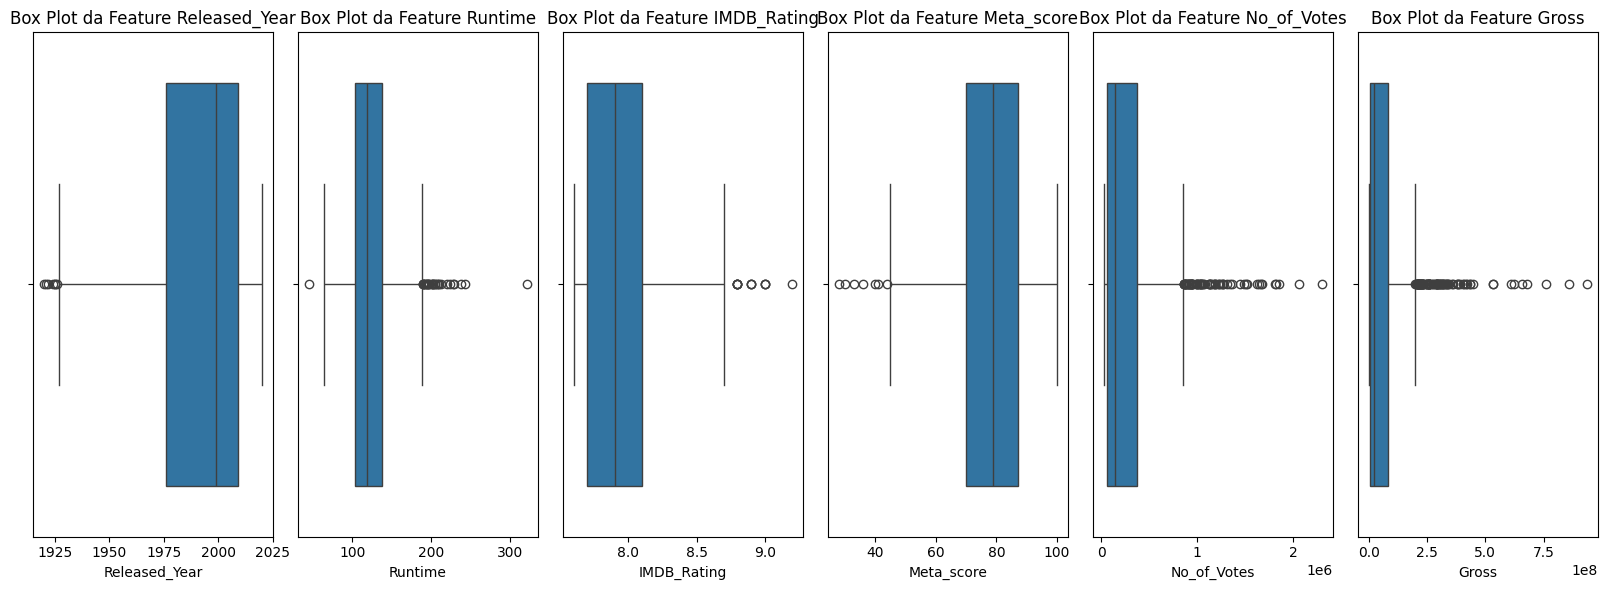

In [24]:
# Filtrar apenas as colunas numéricas
numerical_features_plot = df_numerical_features.columns

# Configurar a figura com subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features_plot), figsize=(16, 6))

# Iterar sobre cada nome de feature numérica e plotar o box plot no subplot correspondente
for i, feature in enumerate(numerical_features_plot):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot da Feature {feature}')
    axes[i].set_xlabel(f'{feature}')

# Ajustar layout da figura
plt.tight_layout()
plt.show()

Considerações

Released_Year:

A maioria dos filmes foi lançada entre aproximadamente 1970 e 2015.
Existem alguns outliers, especialmente filmes lançados antes de 1970.
Runtime:

A maioria dos filmes tem uma duração entre aproximadamente 100 e 200 minutos.
Existem outliers para filmes com durações muito curtas e muito longas.

IMDB_Rating:

As avaliações IMDb estão concentradas entre 7.5 e 8.5.
Existem alguns outliers com avaliações acima de 8.5.

Meta_score:

As pontuações Meta estão concentradas entre 50 e 80.
Existem vários outliers com pontuações abaixo de 50 e acima de 80.
No_of_Votes:

A maioria dos filmes tem até 1 milhão de votos.
Existem muitos outliers com mais de 1 milhão de votos.

Gross:

A maioria dos filmes tem uma receita bruta de até 250 milhões.
Existem outliers com receitas brutas significativamente maiores, chegando a até 750 milhões.

As variáveis No_of_Votes e Gross têm uma escala significativamente diferente das outras variáveis, o que pode exigir normalização ou padronização

Skewness:
 Released_Year   -1.144282
Runtime          1.009530
IMDB_Rating      1.114826
Meta_score      -0.583372
No_of_Votes      1.819175
Gross            2.916618
dtype: float64

Kurtosis:
 Released_Year     0.917191
Runtime           1.355109
IMDB_Rating       1.252506
Meta_score        0.476433
No_of_Votes       4.202182
Gross            12.108811
dtype: float64


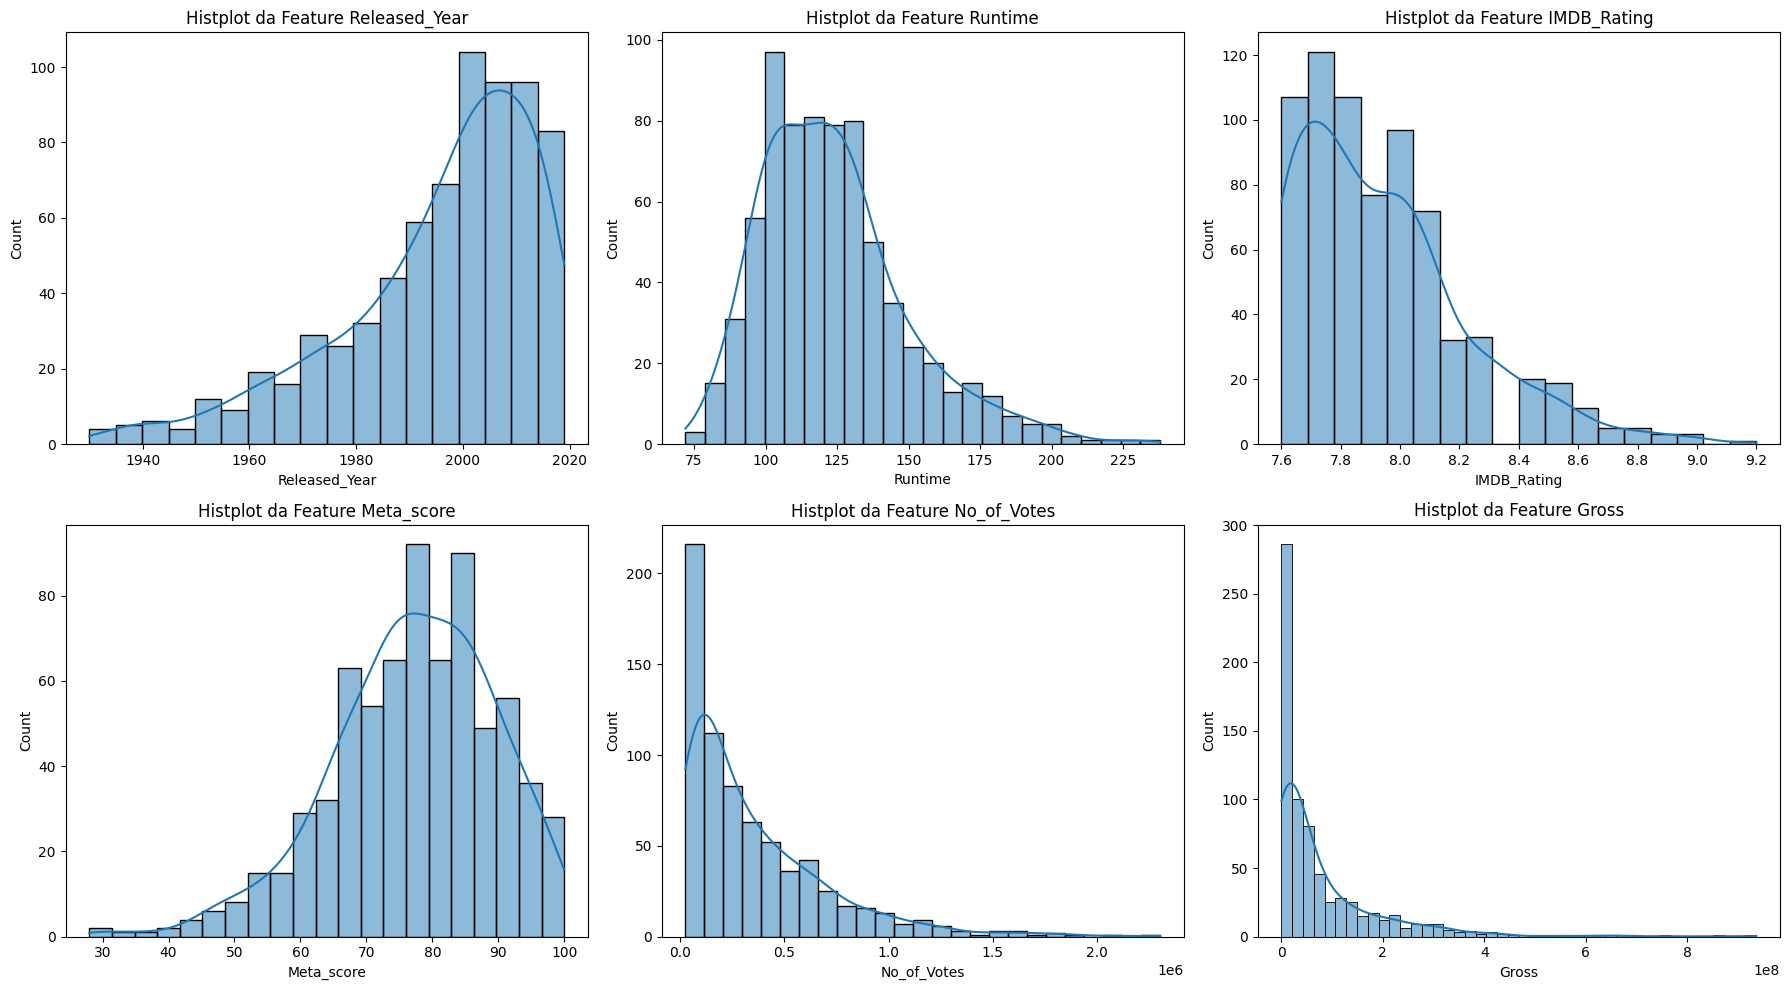

In [25]:
# Features a serem analisadas
features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Calculando skew e kurtosis
skewness = df_numerical_features[features].apply(skew)
kurt = df_numerical_features[features].apply(kurtosis)

# Exibindo os valores de skew e kurtosis
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)

# Plotando histplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df_numerical_features[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histplot da Feature {feature}')

plt.tight_layout()
plt.show()

Vamos analisar a caudose e curtose com os valores nulos inputados pela mediana


Skewness:
 Released_Year   -0.938045
Runtime          1.208060
IMDB_Rating      0.945271
Meta_score      -0.698643
No_of_Votes      2.191055
Gross            3.495679
dtype: float64

Kurtosis:
 Released_Year    -0.027235
Runtime           3.405769
IMDB_Rating       1.047107
Meta_score        1.072006
No_of_Votes       6.005129
Gross            17.152826
dtype: float64


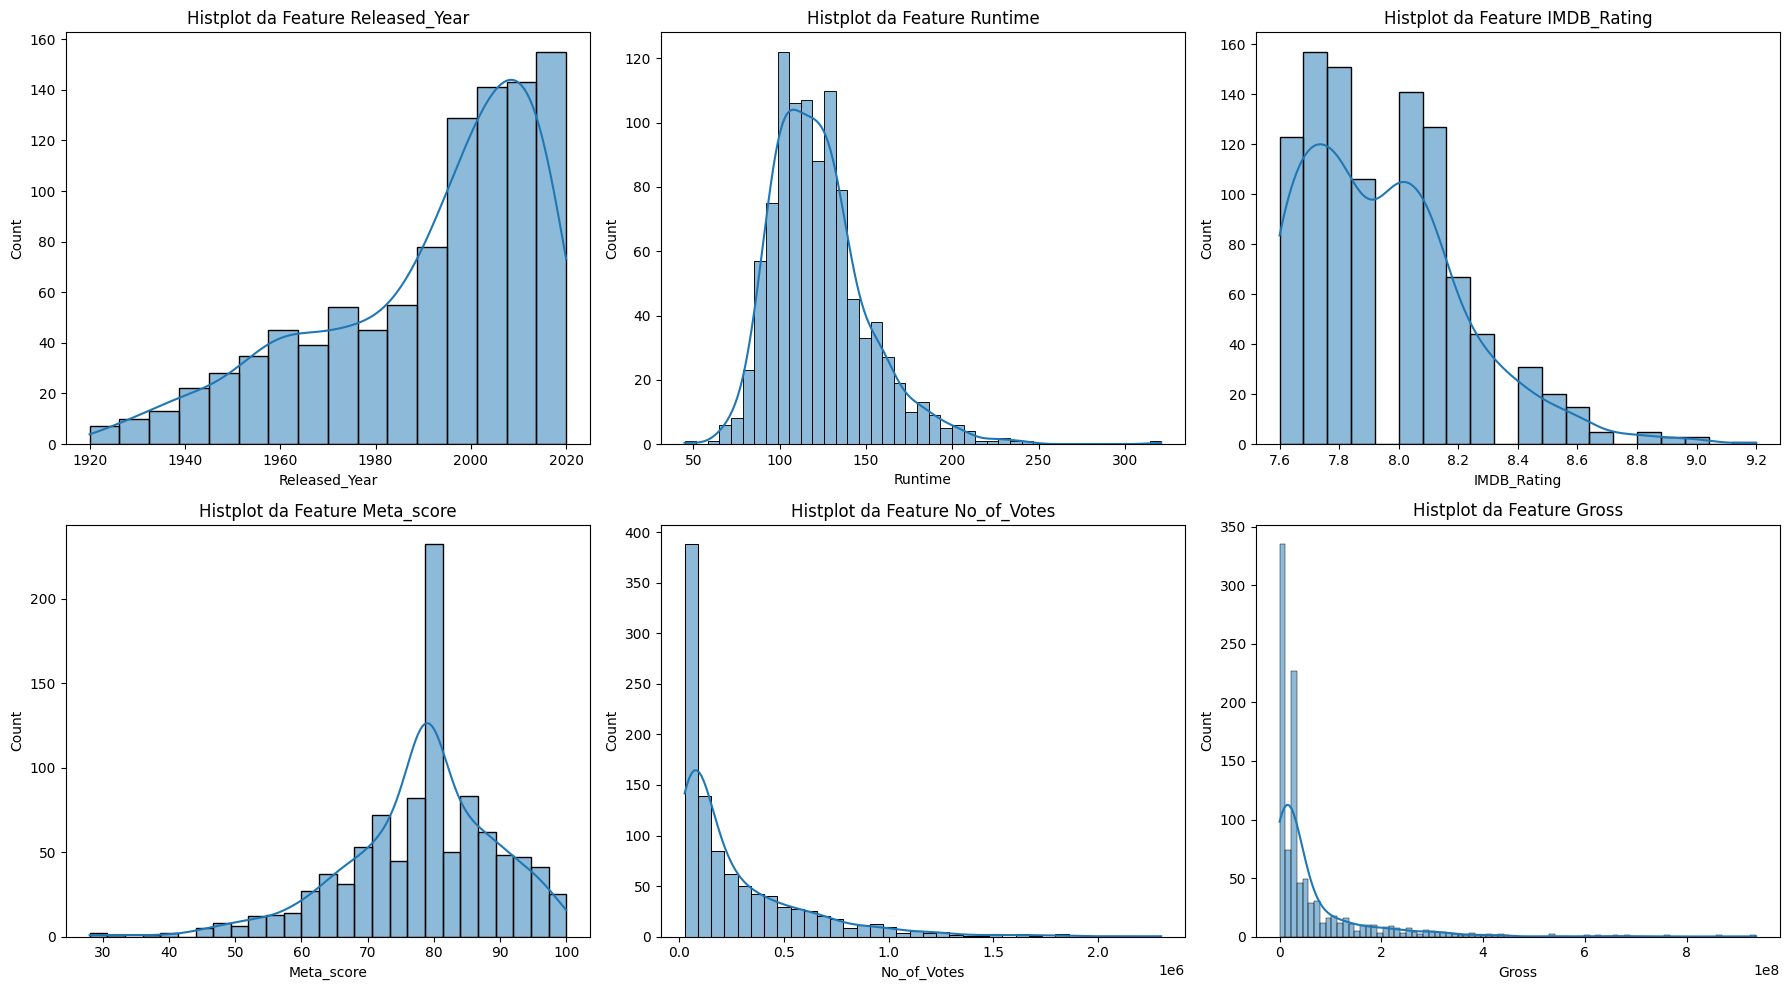

In [26]:
#df_median = df_median.select_dtypes(include=['number'])

features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

skewness = df_median[features].apply(skew)
kurt = df_median[features].apply(kurtosis)

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df_median[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histplot da Feature {feature}')

plt.tight_layout()
plt.show()

Skewness:
 Released_Year   -0.938045
Runtime          1.208060
IMDB_Rating      0.945271
Meta_score      -0.657077
No_of_Votes      2.191055
Gross            3.425225
dtype: float64

Kurtosis:
 Released_Year    -0.027235
Runtime           3.405769
IMDB_Rating       1.047107
Meta_score        1.042189
No_of_Votes       6.005129
Gross            17.224666
dtype: float64


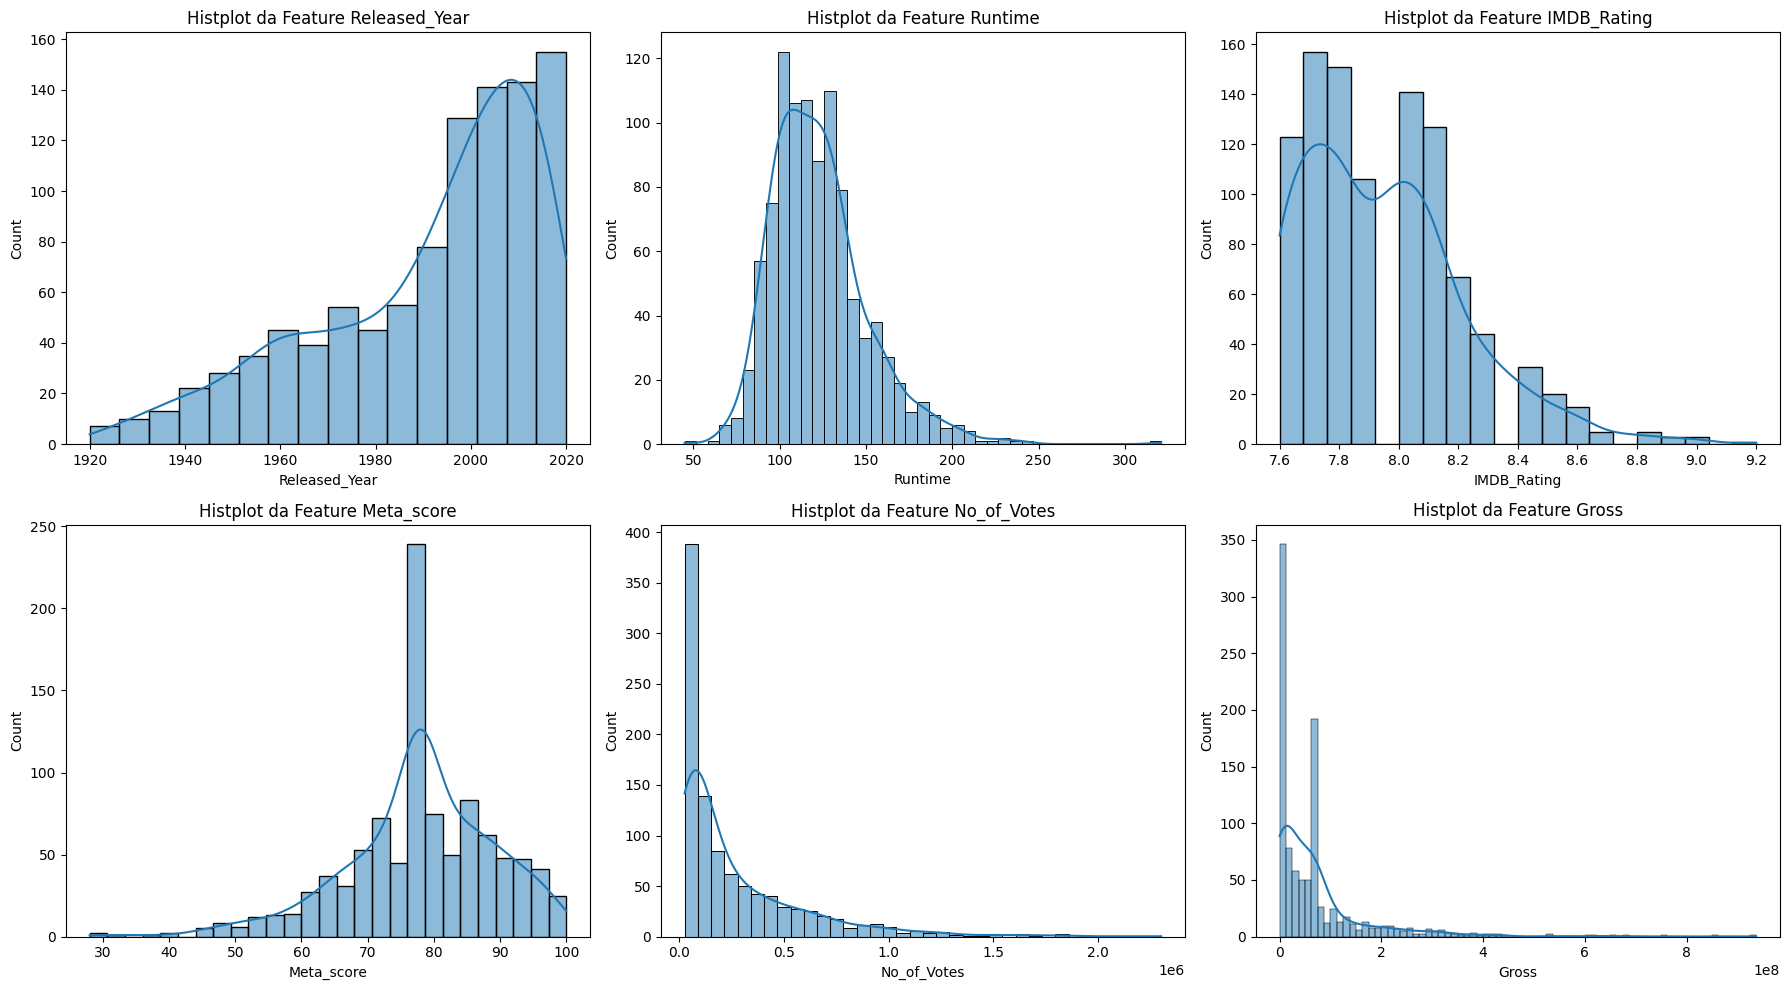

In [27]:
#df_mean = df_median.select_dtypes(include=['number'])

features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']


skewness = df_mean[features].apply(skew)
kurt = df_mean[features].apply(kurtosis)

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df_mean[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histplot da Feature {feature}')

plt.tight_layout()
plt.show()

Released_Year: Apresenta assimetria negativa moderada e kurtosis próxima de zero, indicando uma distribuição levemente distorcida para a esquerda, com caudas normais.

Runtime: Alta assimetria positiva e kurtosis acima de 3 indicam uma distribuição fortemente distorcida para a direita, com algumas caudas pesadas.

IMDB_Rating: Assimetria positiva moderada e kurtosis acima de 1, sugerindo uma leve distorção para a direita e algumas caudas mais pesadas.

Meta_score: Moderada assimetria negativa e kurtosis levemente acima de 1, indicando uma distribuição levemente distorcida para a esquerda com algumas caudas mais pesadas.

No_of_Votes: Alta assimetria positiva e kurtosis muito elevada indicam uma distribuição muito distorcida para a direita com muitas caudas pesadas.

Gross: Muito alta assimetria positiva e kurtosis extremamente elevada indicam uma distribuição extremamente distorcida para a direita com muitas caudas pesadas.

Comparação Entre Métodos de Imputação

Os valores de skewness e kurtosis são idênticos para ambas as técnicas de imputação (média e mediana), sugerindo que a escolha entre média e mediana não afetou a distribuição das variáveis. No entanto, é importante considerar as correlações com a variável alvo para determinar qual método é mais apropriado para a modelagem.

Escolha do Método de Imputação para Modelo de Regressão

Resistência a Outliers: A mediana não é influenciada por valores extremos, o que é especialmente relevante para variáveis como Gross e No_of_Votes, que apresentam alta assimetria positiva e kurtosis elevada.

Vamos verificar como será o desempenho de ML com sem inputação, média e mediana na regressão.

In [28]:

# Modelo de regressão dropando valores nulos
X = df_numerical_features.drop('IMDB_Rating', axis=1)
y = df_numerical_features['IMDB_Rating']

# Definir os parâmetros iniciais
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.06,
    'n_estimators': 80,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0,
    'random_state': 42
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Definir o espaço de parâmetros para a busca aleatória
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0],
    'gamma': [0, 0.1, 0.3]
}

# Criar o modelo XGBoost
regressor = xgb.XGBRegressor(**params)

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=1)

# Realizar a busca aleatória nos dados
random_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on teste: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score on teste: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error teste: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')
#modelo1


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores parâmetros encontrados: {'subsample': 0.5, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Mean Squared Error on teste: 0.033854938232578895
R² Score on teste: 0.5270660509905415
Mean Absolute Error teste: 0.1472445547997535
MAPE: 1.85%
Accuracy: 98.15 %


In [29]:

# Modelo de regressão com inputação pela mediana
X = df_median.drop('IMDB_Rating', axis=1)
y = df_median['IMDB_Rating']

# Definir os parâmetros iniciais
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.06,
    'n_estimators': 80,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0,
    'random_state': 42
}

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Definir o espaço de parâmetros para a busca aleatória
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0],
    'gamma': [0, 0.1, 0.3]
}

# Criar o modelo XGBoost
regressor = xgb.XGBRegressor(**params)

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=1)

# Realizar a busca aleatória nos dados
random_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")

# Avaliar o desempenho do melhor modelo
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on teste: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score on teste: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error teste: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores parâmetros encontrados: {'subsample': 0.5, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Mean Squared Error on teste: 0.03235306012841006
R² Score on teste: 0.5279940165454902
Mean Absolute Error teste: 0.1447999739646912
MAPE: 1.82%
Accuracy: 98.18 %


In [30]:

#Regressão do modelo com inputação pela média
X = df_mean.drop('IMDB_Rating', axis=1)
y = df_mean['IMDB_Rating']

# Definir os parâmetros iniciais
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.06,
    'n_estimators': 80,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0,
    'random_state': 42
}

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Definir o espaço de parâmetros para a busca aleatória
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0],
    'gamma': [0, 0.1, 0.3]
}

# Criar o modelo XGBoost
regressor = xgb.XGBRegressor(**params)

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=1)

# Realizar a busca aleatória nos dados
random_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")

# Avaliar o desempenho do melhor modelo
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on teste: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score on teste: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error teste: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores parâmetros encontrados: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Mean Squared Error on teste: 0.031893310213657246
R² Score on teste: 0.5347014102138088
Mean Absolute Error teste: 0.14077048015594484
MAPE: 1.77%
Accuracy: 98.23 %


Nosso melhor modelo até agora foi :

Com inputação pela média

Melhores parâmetros encontrados: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}

Mean Squared Error on teste: 0.031893310213657246

R² Score on teste: 0.5347014102138088

Mean Absolute Error teste: 0.14077048015594484

MAPE: 1.77%

Accuracy: 98.23 %

0      organized crime dynastys aging patriarch trans...
1      menace known joker wreaks havoc chaos people g...
2      early life career vito corleone new york city ...
3      jury holdout attempts prevent miscarriage just...
4      gandalf aragorn lead world men saurons army dr...
                             ...                        
994    young new york socialite becomes interested yo...
995    sprawling epic covering life texas cattle ranc...
996    hawaii private cruelly punished boxing units t...
997    several survivors torpedoed merchant ship worl...
998    man london tries help counterespionage agent a...
Name: Overview, Length: 999, dtype: object
Palavras mais frequentes para o gênero 'Crime':
young: 16
murder: 15
crime: 13
family: 11
man: 11
police: 11
son: 8
life: 8
lives: 7
years: 7
Palavras mais frequentes para o gênero 'Action':
must: 19
young: 15
man: 14
world: 12
former: 12
war: 12
find: 11
help: 10
battle: 10
officer: 10
Palavras mais frequentes para o gênero 'Bi

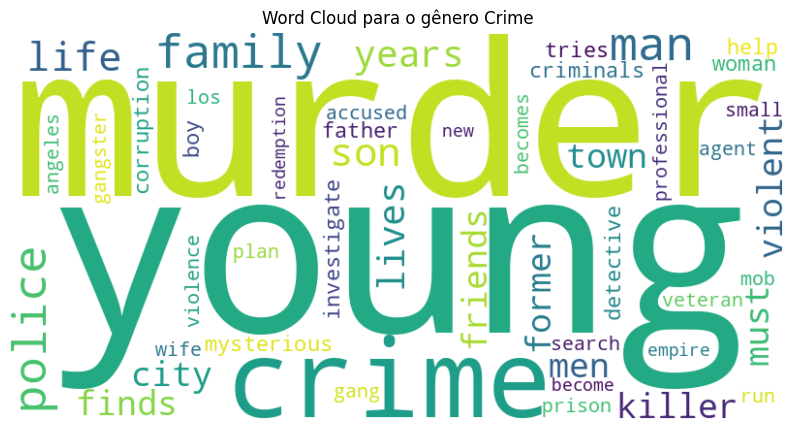

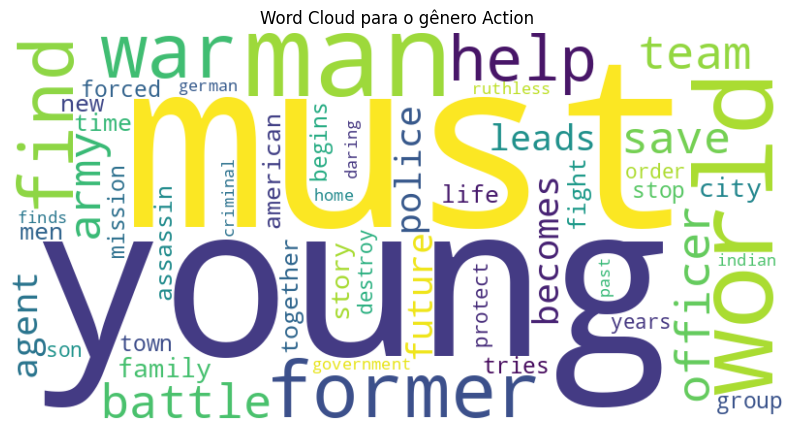

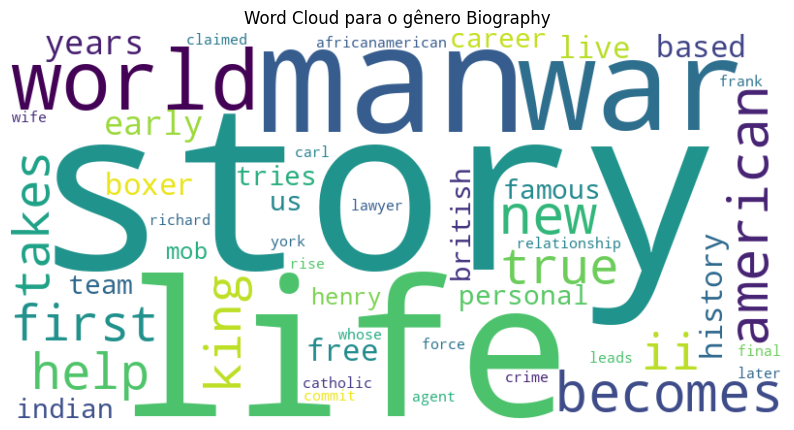

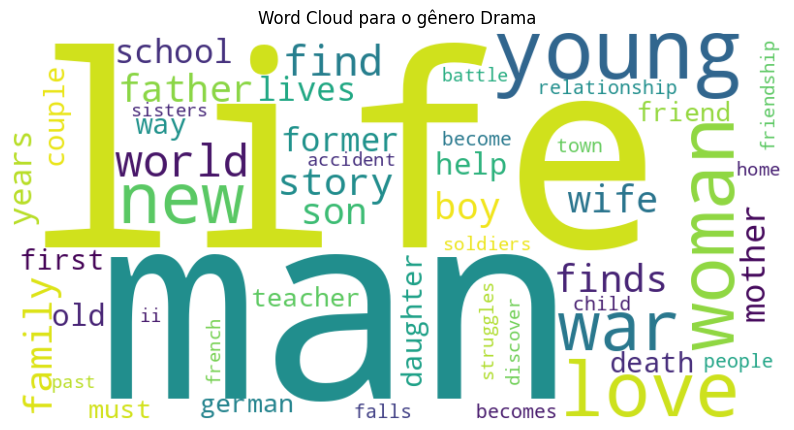

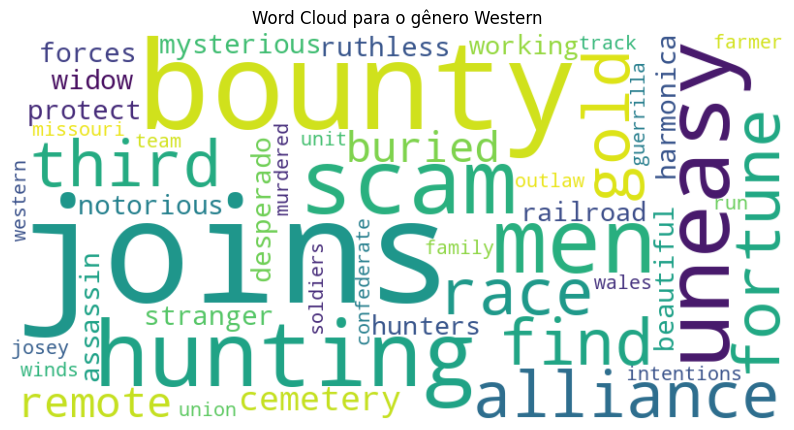

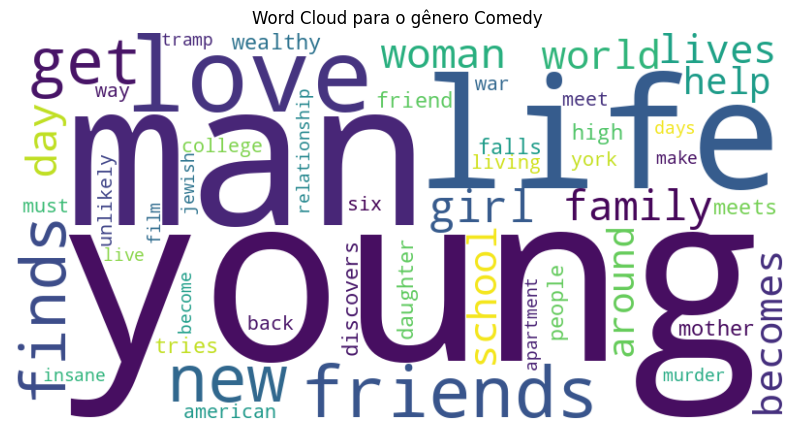

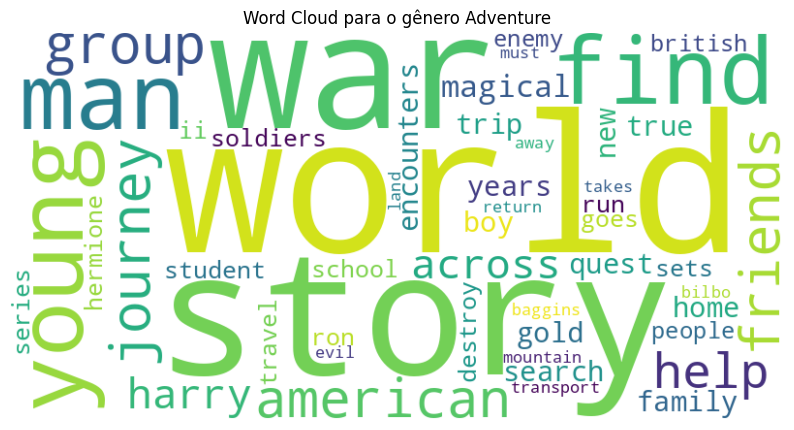

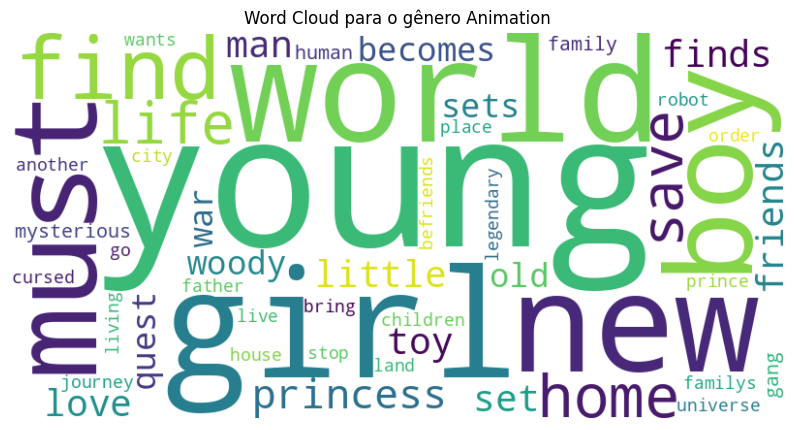

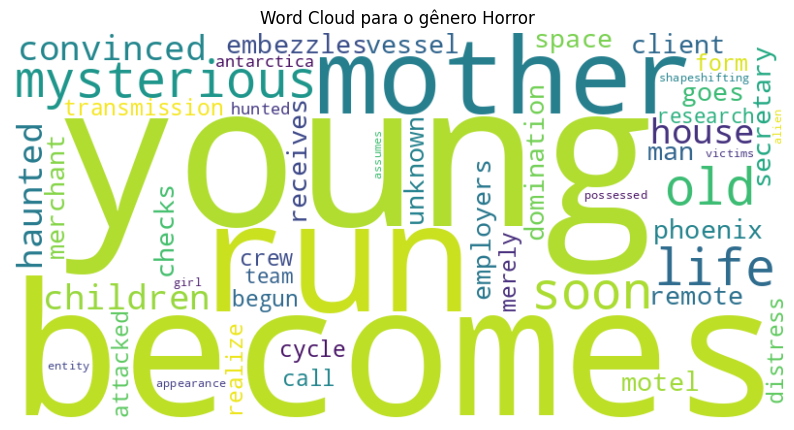

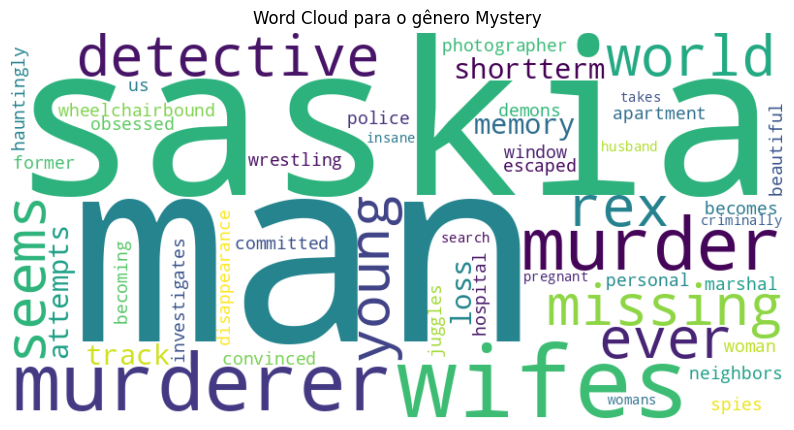

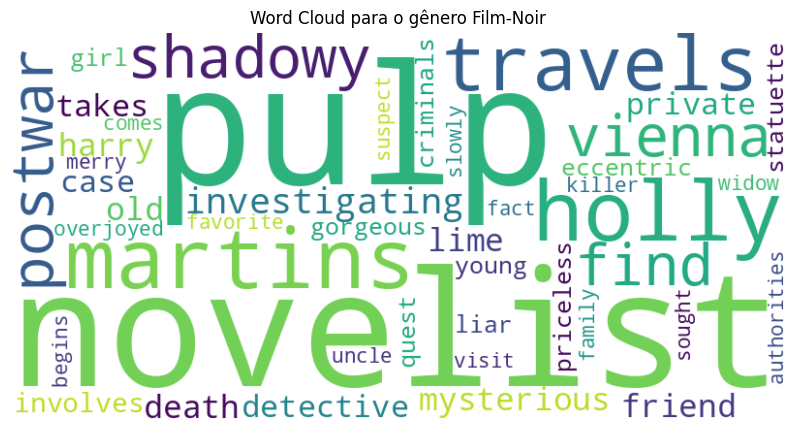

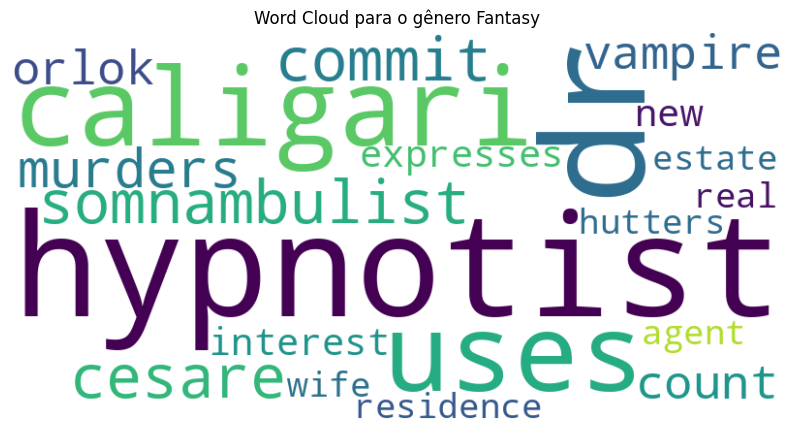

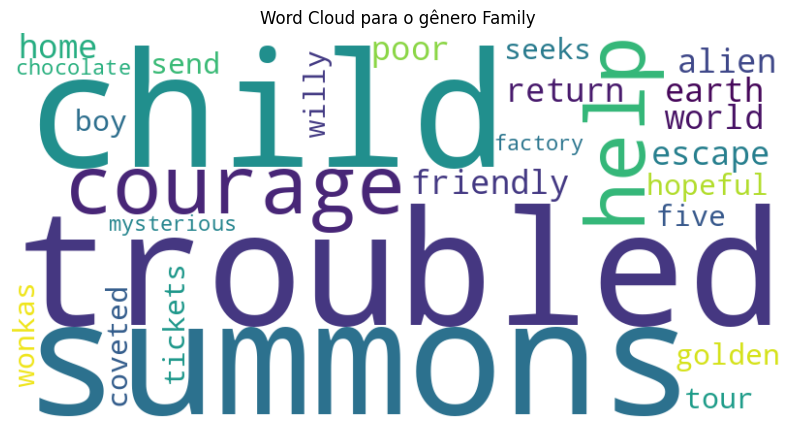

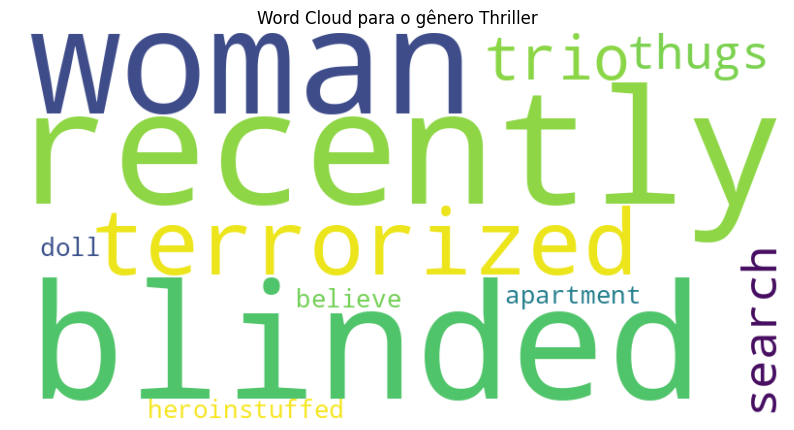

In [31]:


categorics_word_cloud = df.select_dtypes(include=['object'])
categorics_nlp = categorics.copy()


# Funções de limpeza do texto
def clean_1(text):
    text = text.lower()
    text = re.sub(r'\(.*?\)', '', text)  # parênteses
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # pontuações
    text = re.sub(r'\w*\d\w*', '', text)  # números
    return text

def clean_2(text):
    text = re.sub(r'[‘’“”…]', '', text)  # caracteres especiais
    text = re.sub(r'\n', '', text)  # quebras de linha
    return text

def first_clean(text):
    return clean_1(text)

def second_clean(text):
    return clean_2(text)

# Definir as stopwords em inglês
stop_words = set(stopwords.words('english'))

# Lista personalizada de palavras a serem removidas
custom_stop_words = {'one', 'two', 'three', 'four'}

# Função para remover números
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

# Função para processar a coluna 'Overview'
def process_overview(text):
    text = first_clean(text)
    text = second_clean(text)
    text = remove_numbers(text)
    words = word_tokenize(text)
    processed_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation and word not in custom_stop_words]
    return ' '.join(processed_words)

# Aplicar a função de processamento à coluna 'Overview'
categorics_word_cloud['Overview'] = categorics_word_cloud['Overview'].apply(process_overview)

# Verificar o resultado
print(categorics_word_cloud['Overview'])

# Função para extrair a primeira palavra do gênero
def extract_first_genre_word(genre):
    if pd.notnull(genre):
        return genre.split(',')[0].strip()
    else:
        return 'Unknown'

# Aplicar a função de extração à coluna 'Genre'
categorics_word_cloud['first_genre_word'] = categorics_word_cloud['Genre'].apply(extract_first_genre_word)

# Agrupamento e contagem das palavras mais frequentes por gênero
word_counts = defaultdict(lambda: defaultdict(int))

for index, row in categorics_word_cloud.iterrows():
    words = row['Overview'].split()
    genre_word = row['first_genre_word']
    for word in words:
        word_counts[genre_word][word] += 1

for genre_word, counts in word_counts.items():
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"Palavras mais frequentes para o gênero '{genre_word}':")
    for word, count in sorted_counts:
        print(f"{word}: {count}")

# Função para gerar nuvem de palavras
def generate_wordcloud(frequencies, genre):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(frequencies)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud para o gênero {genre}')
    plt.axis('off')
    plt.show()

# Gerando a nuvem de palavras para cada gênero
for genre_word, counts in word_counts.items():
    generate_wordcloud(counts, genre_word)


Palavras mais frequentes para o gênero 'Crime':
young: 16
murder: 15
crime: 13
family: 11
man: 11

Palavras mais frequentes para o gênero 'Action':
must: 19
young: 15
man: 14
world: 12
former: 12

Palavras mais frequentes para o gênero 'Biography':
story: 22
life: 17
man: 10
war: 7
world: 6

Palavras mais frequentes para o gênero 'Drama':
life: 42
man: 41
young: 40
woman: 34
love: 32

Palavras mais frequentes para o gênero 'Western':
joins: 3
bounty: 2
hunting: 1
scam: 1
men: 1

Palavras mais frequentes para o gênero 'Comedy':
young: 24
man: 17
life: 17
love: 16
friends: 14

Palavras mais frequentes para o gênero 'Adventure':
world: 10
story: 8
war: 7
find: 7
man: 7

Palavras mais frequentes para o gênero 'Animation':
young: 23
girl: 14
world: 13
new: 12
boy: 9

Palavras mais frequentes para o gênero 'Horror':
young: 3
becomes: 3
run: 2
mother: 2
mysterious: 2

Palavras mais frequentes para o gênero 'Mystery':
man: 3
saskia: 3
wifes: 2
murderer: 2
murder: 2

Palavras mais frequentes para o gênero 'Film-Noir':
pulp: 1
novelist: 1
holly: 1
martins: 1
travels: 1

Palavras mais frequentes para o gênero 'Fantasy':
hypnotist: 1
dr: 1
caligari: 1
uses: 1
somnambulist: 1

Palavras mais frequentes para o gênero 'Family':
troubled: 1
child: 1
summons: 1
courage: 1
help: 1

Palavras mais frequentes para o gênero 'Thriller':
recently: 1
blinded: 1
woman: 1
terrorized: 1
trio: 1


In [32]:
categorics = df.select_dtypes(include=['object'])

In [33]:
#Vamos fazer o input da moda na feature Certificate
df_certificate = categorics['Certificate'].mode()

#Vamos inputar
categorics['Certificate'] = categorics['Certificate'].fillna(df_certificate[0])

In [34]:
#Verificando se deu certo
categorics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series_Title  999 non-null    object
 1   Certificate   999 non-null    object
 2   Genre         999 non-null    object
 3   Overview      999 non-null    object
 4   Director      999 non-null    object
 5   Star1         999 non-null    object
 6   Star2         999 non-null    object
 7   Star3         999 non-null    object
 8   Star4         999 non-null    object
dtypes: object(9)
memory usage: 70.4+ KB


In [35]:
#Vamos analisar valores únicos em Genre, Director, Star1, Star2, Star3 e Star4
categorics.nunique()
#Vamos verificar qual filme tem o nome repitido
# Verificar valores repetidos na coluna 'coluna'
valores_repetidos = df['Series_Title'].value_counts()

# Filtrar apenas o valor que se repete
valor_repetido = valores_repetidos[valores_repetidos > 1].index[0]

print(f"Valor repetido na coluna 'coluna': {valor_repetido}")
#Vamos acessar os dois filmes repitidos e verificar se algum precisará ser dropado
categorics[categorics['Series_Title'] == valor_repetido]

#São filmes diferentes com diretores e atores diferentes

Valor repetido na coluna 'coluna': Drishyam


Series_Title Certificate                   Genre  \
86      Drishyam           U  Crime, Drama, Thriller   
135     Drishyam          UA   Crime, Drama, Mystery   

                                              Overview         Director  \
86   A man goes to extreme lengths to save his fami...    Jeethu Joseph   
135  Desperate measures are taken by a man who trie...  Nishikant Kamat   

          Star1         Star2         Star3         Star4  
86     Mohanlal         Meena  Asha Sharath        Ansiba  
135  Ajay Devgn  Shriya Saran          Tabu  Rajat Kapoor

In [36]:
categorics.nunique()

Series_Title    998
Certificate      16
Genre           202
Overview        999
Director        548
Star1           659
Star2           840
Star3           890
Star4           938
dtype: int64

In [37]:
# Aplicando a normalização
df_obj_normalized = categorics.select_dtypes(include=['object']).applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# Atualizando o DataFrame original
categorics.update(df_obj_normalized)

In [38]:
#Vamos fazer Dummy na feature de Gêneros dos filmes
# 1. Separar os gêneros em múltiplas linhas
categorics_expanded = categorics['Genre'].str.get_dummies(sep=', ')

# 2. Criar variáveis dummy
categorics_one_hot = pd.concat([categorics, categorics_expanded], axis=1)

print("DataFrame com variáveis dummy para gêneros:")
print(categorics_one_hot)

DataFrame com variáveis dummy para gêneros:
                                      Series_Title Certificate  \
0                                    the godfather           a   
1                                  the dark knight          ua   
2                           the godfather: part ii           a   
3                                     12 angry men           u   
4    the lord of the rings: the return of the king           u   
..                                             ...         ...   
994                         breakfast at tiffany's           a   
995                                          giant           g   
996                          from here to eternity      passed   
997                                       lifeboat           u   
998                                   the 39 steps           u   

                        Genre  \
0                crime, drama   
1        action, crime, drama   
2                crime, drama   
3                crime, drama  

In [39]:
categorics_one_hot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series_Title  999 non-null    object
 1   Certificate   999 non-null    object
 2   Genre         999 non-null    object
 3   Overview      999 non-null    object
 4   Director      999 non-null    object
 5   Star1         999 non-null    object
 6   Star2         999 non-null    object
 7   Star3         999 non-null    object
 8   Star4         999 non-null    object
 9   action        999 non-null    int64 
 10  adventure     999 non-null    int64 
 11  animation     999 non-null    int64 
 12  biography     999 non-null    int64 
 13  comedy        999 non-null    int64 
 14  crime         999 non-null    int64 
 15  drama         999 non-null    int64 
 16  family        999 non-null    int64 
 17  fantasy       999 non-null    int64 
 18  film-noir     999 non-null    int64 
 19  history 

Vamos continuar a exploração e tratamentos das features categoricas

vamos verificar a coluna certificate que contém a classificação indicativa dos filmes

Foi realizado uma pesquisa sobre os tipos de Certificates, alguns a maioria deles em nossa features são do padrão Grã-bretanho e dos EUA. Porém temos como agrupar para diminuir uma melhor padronização e diminuir a quantidades para gerar melhores insights.

In [40]:
categorics_one_hot['Certificate'].value_counts()

Certificate
u           335
a           196
ua          175
r           146
pg-13        43
pg           37
passed       34
g            12
approved     11
tv-pg         3
gp            2
tv-14         1
16            1
tv-ma         1
unrated       1
u/a           1
Name: count, dtype: int64

In [41]:
# Definindo as categorias agrupadas
categorias_agrupadas = {
    'pg': 'pg',
    'a': 'adult',
    'ua': 'pg-12',
    'r': 'adult',
    'pg-13': 'pg-13',
    'passed': 'pg-13',
    'g': 'general audience',
    'approved': 'general audience',
    'tv-pg': 'pg-13',
    'gp': 'pg',
    'tv-14': 'pg-14',
    '16': 'pg-16',
    'tv-ma': 'adult',
    'unrated': 'unrated',
    'u/a': 'pg-12'
}

# Aplicar o mapeamento ao DataFrame
categorics_one_hot['Certificate_Agrupado'] = categorics_one_hot['Certificate'].map(categorias_agrupadas)

# Verificar a distribuição das novas categorias agrupadas
print(categorics_one_hot['Certificate_Agrupado'].value_counts())

# Criar variáveis dummy
certificates_dummie = pd.get_dummies(categorics_one_hot['Certificate_Agrupado'], prefix='Certificate')

# Concatenar as variáveis dummy ao DataFrame original
categorics_with_dummies = pd.concat([categorics_one_hot, certificates_dummie], axis=1)


Certificate_Agrupado
adult               343
pg-12               176
pg-13                80
pg                   39
general audience     23
pg-14                 1
pg-16                 1
unrated               1
Name: count, dtype: int64


In [42]:
categorics_with_dummies = categorics_with_dummies.select_dtypes(include=['number', 'boolean'])
df_categorics_num = pd.concat([categorics_with_dummies, df_median], axis=1)

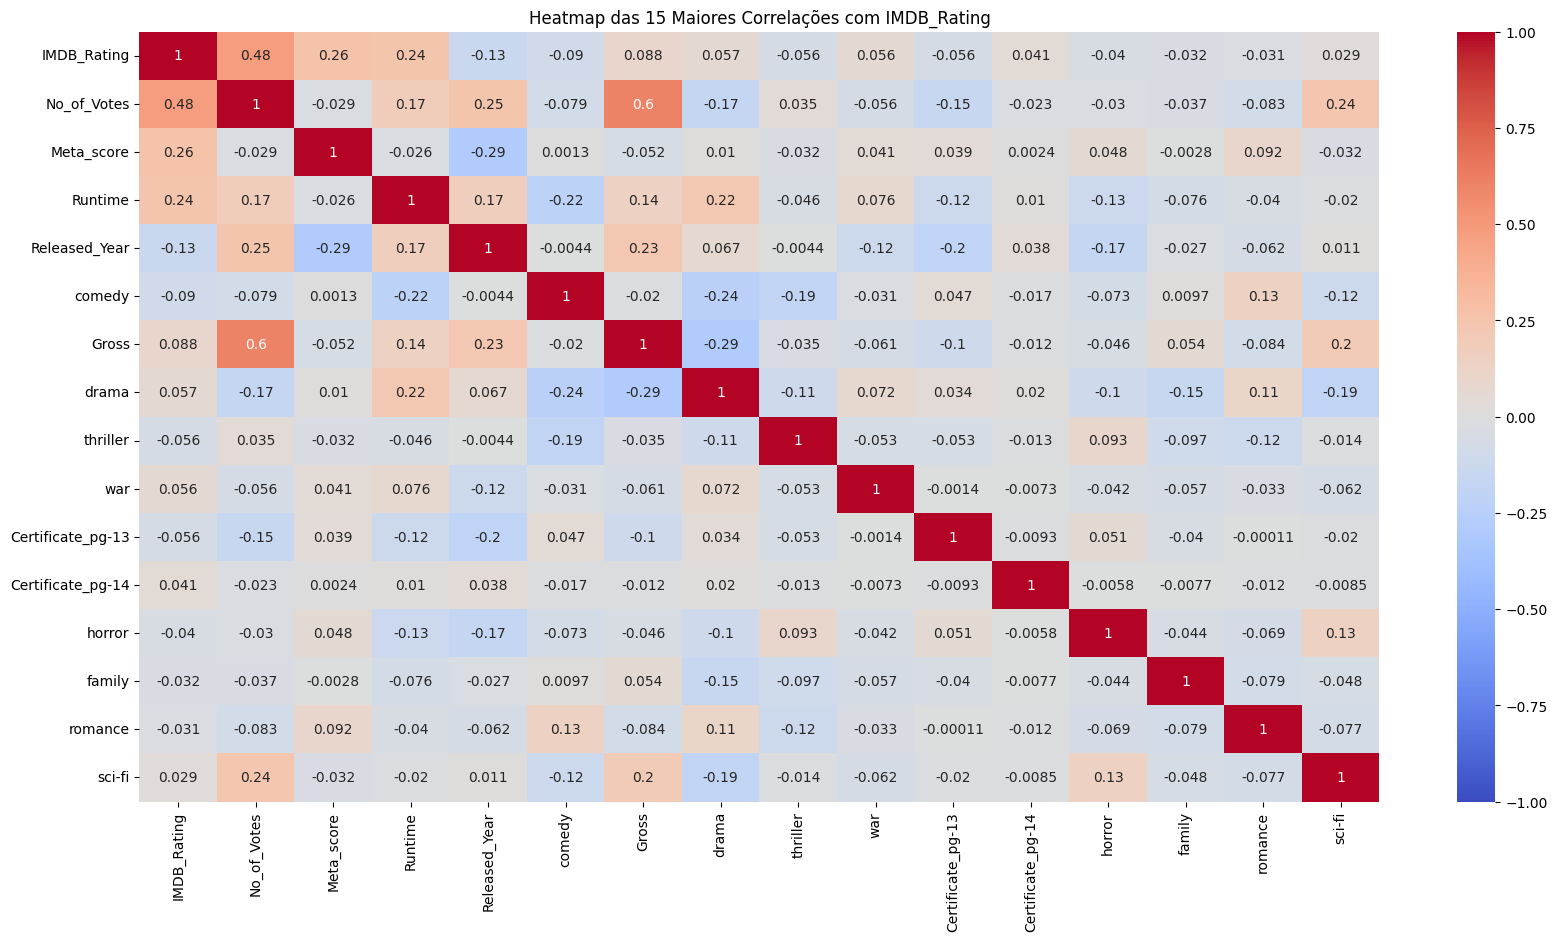

In [43]:
#Vamos fazer as correlações pela nota do IMDB

# Calculando a correlação
correlation_matrix = df_categorics_num.corr()

# Selecionando a coluna que você deseja analisar (por exemplo, 'IMDB_Rating')
column_to_analyze = 'IMDB_Rating'

# Calculando a correlação com a coluna especificada
correlation_with_target = correlation_matrix[column_to_analyze]

# Ordenando pelo valor absoluto da correlação (excluindo a correlação com ela mesma)
sorted_correlation = correlation_with_target.drop(column_to_analyze).abs().sort_values(ascending=False)

# Selecionando as top 15 correlações
top_correlations = sorted_correlation.index[:15]

# Incluindo também a coluna 'IMDB_Rating' nas top correlações
top_correlations = top_correlations.insert(0, column_to_analyze)

# Criando um DataFrame apenas com as top 15 correlações
top_correlation_df = correlation_matrix.loc[top_correlations, top_correlations]

# Gerando o heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(top_correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap das 15 Maiores Correlações com IMDB_Rating')
plt.show()

In [44]:

# Selecionando as top 10 features com maior correlação absoluta
top_features = sorted_correlation.index[:30]
# Modelo de regressão sem inputação
X = df_categorics_num[top_features]

y = df_categorics_num['IMDB_Rating']

# Definir os parâmetros iniciais
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.06,
    'n_estimators': 80,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0,
    'random_state': 42
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Definir o espaço de parâmetros para a busca aleatória
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0],
    'gamma': [0, 0.1, 0.3]
}

# Criar o modelo XGBoost
regressor = xgb.XGBRegressor(**params)

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=1)

# Realizar a busca aleatória nos dados
random_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on teste: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score on teste: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error teste: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')
#modelo1

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores parâmetros encontrados: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Mean Squared Error on teste: 0.03320164268439449
R² Score on teste: 0.5156138570709294
Mean Absolute Error teste: 0.14425987148284913
MAPE: 1.81%
Accuracy: 98.19 %


No modelo com as features numéricas nulas inputadas com a média se demonstrou mais sensível quando fizemos o treino com as features de Gênero e Classificação indicativa, diminuindo o R² para 0.49 já o modelo com mediana ficou em 0.52, se mostrando mais estável. Porém não tivemos melhoras comparado aos primeiros modelos testados.

In [45]:
categorics_nlp_actors = categorics_nlp.copy()

In [46]:
# Top 10 Diretores e atores
directors_count = categorics_nlp_actors['Director'].value_counts().head(20)
actors = pd.concat([categorics_nlp_actors['Star1'], categorics_nlp_actors['Star2'], categorics_nlp_actors['Star3'], categorics_nlp_actors['Star4']])
actors_count = actors.value_counts().head(20)

print("Top 20 Diretores:")
print(directors_count)
print("\nTop 20 Atores:")
print(actors_count)
for director in directors_count.index:
    categorics_nlp_actors[f'Director_{director}'] = (categorics_nlp_actors['Director'] == director).astype(int)
for actor in actors_count.index:
    categorics_nlp_actors[f'Star_{actor}'] =  ((categorics_nlp_actors['Star1'] == actor) | (categorics_nlp_actors['Star2'] == actor) | (categorics_nlp_actors['Star3'] == actor) | (categorics_nlp_actors['Star4'] == actor)).astype(int)

categorics_nlp_actors = categorics_nlp_actors.drop(columns=['Director', 'Star1', 'Star2', 'Star3', 'Star4'])
categorics_nlp_actors = categorics_nlp_actors.select_dtypes(include=['number'])

Top 20 Diretores:
Director
Steven Spielberg        13
Martin Scorsese         10
Alfred Hitchcock         9
David Fincher            8
Clint Eastwood           8
Quentin Tarantino        8
Christopher Nolan        8
Woody Allen              7
Rob Reiner               7
Hayao Miyazaki           7
Stanley Kubrick          6
Richard Linklater        6
Wes Anderson             6
Ridley Scott             6
Joel Coen                6
James Cameron            5
Alfonso Cuarón           5
Denis Villeneuve         5
Francis Ford Coppola     5
Ron Howard               5
Name: count, dtype: int64

Top 20 Atores:
Robert De Niro        16
Tom Hanks             14
Al Pacino             13
Brad Pitt             12
Matt Damon            11
Christian Bale        11
Leonardo DiCaprio     11
Clint Eastwood        11
Johnny Depp            9
Denzel Washington      9
Scarlett Johansson     9
Ethan Hawke            9
Harrison Ford          8
Ian McKellen           7
Jake Gyllenhaal        7
Robert Downey Jr

In [47]:
categorics_nlp_actors = pd.concat([categorics_nlp_actors, df_categorics_num], axis=1)

In [48]:

# Ordenar as correlações com IMDB_Rating em ordem decrescente
sorted_correlations = categorics_nlp_actors['IMDB_Rating'].sort_values(ascending=False)

# Selecionar as top 40 maiores correlações
top_40_correlations = sorted_correlations.head(40)

# Criar um DataFrame para armazenar as top 40 correlações
top_40_correlation_df = pd.DataFrame(top_40_correlations).reset_index()
top_40_correlation_df.columns = ['Feature', 'Correlation']

# Ordenar pelo valor absoluto das correlações (se desejar)
top_40_correlation_df['Abs_Correlation'] = top_40_correlation_df['Correlation'].abs()
top_40_correlation_df = top_40_correlation_df.sort_values(by='Abs_Correlation', ascending=False).drop('Abs_Correlation', axis=1)

# Ordenar as correlações com IMDB_Rating em ordem decrescente de valor absoluto
correlation_matrix = categorics_nlp_actors.corr()
sorted_correlations = correlation_matrix['IMDB_Rating'].abs().sort_values(ascending=False)

# Selecionar as top 40 maiores correlações absolutas, excluindo a própria 'IMDB_Rating'
top_40_correlations = sorted_correlations.index[1:16]  # Exclui 'IMDB_Rating' e pega as próximas 20 melhores correlações

# Criar um DataFrame para armazenar as top 40 correlações
top_40_correlation_df = correlation_matrix.loc[top_40_correlations, ['IMDB_Rating']]
top_40_correlation_df = top_40_correlation_df.reset_index()
top_40_correlation_df.columns = ['Feature', 'Correlation']

# Ordenar pelo valor absoluto das correlações (se desejar)
top_40_correlation_df['Abs_Correlation'] = top_40_correlation_df['Correlation'].abs()
top_40_correlation_df = top_40_correlation_df.sort_values(by='Abs_Correlation', ascending=False).drop('Abs_Correlation', axis=1)

# Exibir as top 40 correlações com IMDB_Rating
print(top_40_correlation_df)

# Selecionando as top 40 features com maior correlação absoluta
top_features = top_40_correlation_df['Feature'].tolist()

# Modelo de regressão XGBoost
X = categorics_nlp_actors[top_features]
y = categorics_nlp_actors['IMDB_Rating']

# Definir os parâmetros iniciais para o XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.06,
    'n_estimators': 80,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0,
    'random_state': 42
}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Definir o espaço de parâmetros para a busca aleatória
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0],
    'gamma': [0, 0.1, 0.3]
}

# Criar o modelo XGBoost
regressor = xgb.XGBRegressor(**params)

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=1)

# Realizar a busca aleatória nos dados
random_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")

# Treinar o modelo com os melhores parâmetros encontrados
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error no teste: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score no teste: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error no teste: {mae}')

# Calculando o MAPE
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print(f'Accuracy: {round(accuracy, 2)}%')



                          Feature  Correlation
0                     No_of_Votes     0.479308
1                      Meta_score     0.261010
2                         Runtime     0.242751
3      Director_Christopher Nolan     0.194498
4   Director_Francis Ford Coppola     0.135251
5                   Released_Year    -0.133355
6              Star_Harrison Ford     0.120726
7        Director_Stanley Kubrick     0.105733
8        Director_Martin Scorsese     0.096967
9               Star_Ian McKellen     0.096225
10                         comedy    -0.090209
11     Director_Quentin Tarantino     0.088451
12                          Gross     0.088139
13         Star_Denzel Washington    -0.087735
14            Star_Robert De Niro     0.086457
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores parâmetros encontrados: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}

Fazendo One hot enconding de algumas features categóricas de diretores e atores pela frequência não obitivemos melhor score e acurácia no nosso modelo de regressão, foi testado várias quantidades de features no nosso eixo X. Vamos tentar abordar agora os atores que tiveram maior nota no IMDB.

                          Feature  Correlation
0                     No_of_Votes     0.479308
1                      Meta_score     0.261010
2                         Runtime     0.242751
3                Star_elijah wood     0.171824
4      Director_christopher nolan     0.169873
5                   Released_Year    -0.133355
6                Star_mark hamill     0.118048
7   Director_francis ford coppola     0.117806
8              Star_marlon brando     0.111140
9              Star_john travolta     0.110734
10          Director_milos forman     0.090852
11                         comedy    -0.090209
12                          Gross     0.088139
13        Director_irvin kershner     0.087472
14        Director_lana wachowski     0.087472


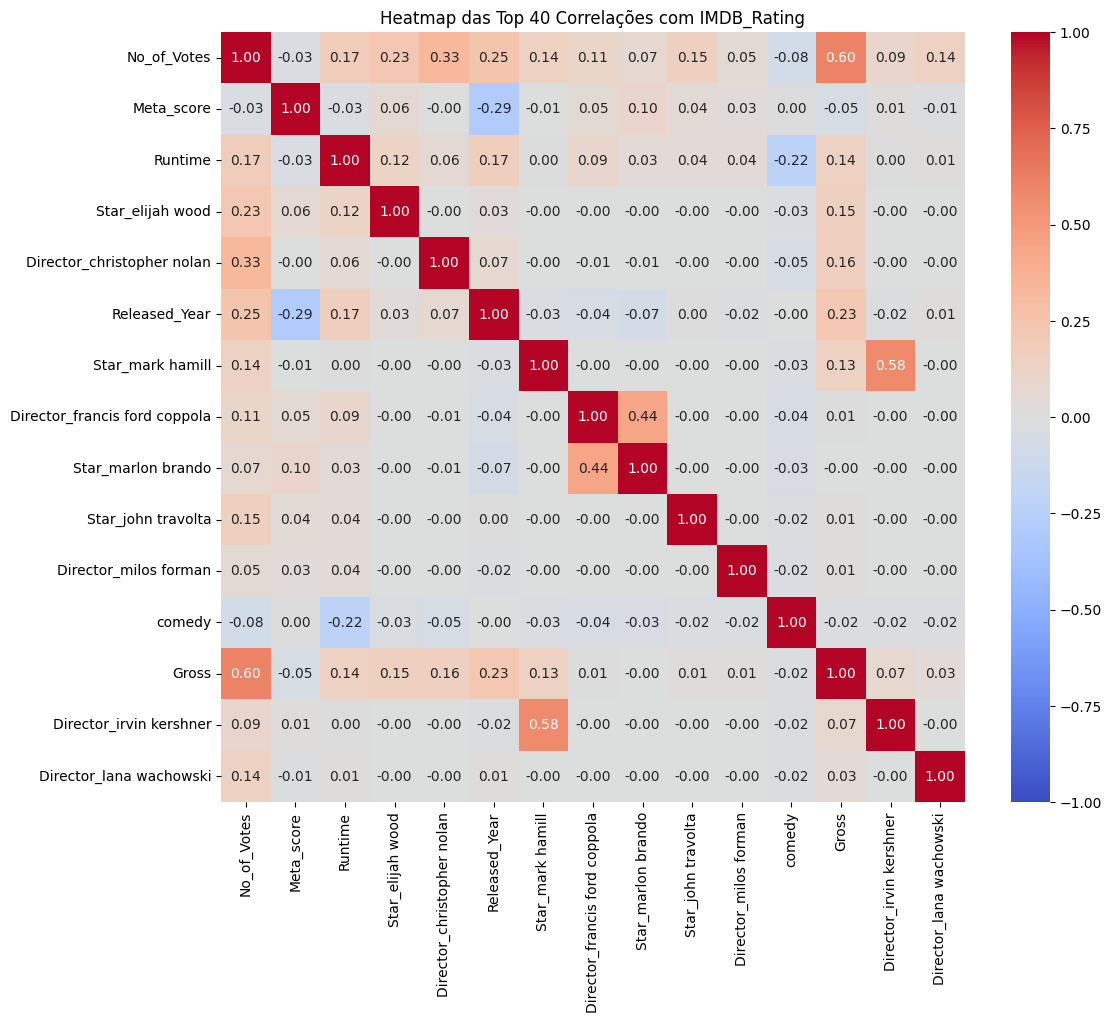

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores parâmetros encontrados: {'subsample': 0.5, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Mean Squared Error no teste: 0.0320988156782857
R² Score no teste: 0.5317032453245453
Mean Absolute Error no teste: 0.14338677501678468
MAPE: 1.80%
Accuracy: 98.2%


In [49]:


# Supondo que você tenha um DataFrame categorics_nlp_actors com os dados dos atores e IMDB_Rating
# Supondo também que df_categorics_num contenha outras colunas numéricas

# Copiar o DataFrame original
categorics_nlp_actors_top10 = categorics.copy()

# Concatenar com as colunas numéricas
categorics_nlp_actors_top10 = pd.concat([categorics_nlp_actors_top10, df_categorics_num], axis=1)

# Calcular a média das notas de IMDb para diretores
directors_mean_rating = categorics_nlp_actors_top10.groupby('Director')['IMDB_Rating'].mean()
top_10_directors = directors_mean_rating.nlargest(20).index

# Calcular a média das notas de IMDb para atores
actors = categorics_nlp_actors_top10[['Star1', 'Star2', 'Star3']].melt(value_name='Actor').drop('variable', axis=1)
actors_avg_rating = actors.join(categorics_nlp_actors_top10[['IMDB_Rating']]).groupby('Actor')['IMDB_Rating'].mean()
top_10_actors = actors_avg_rating.nlargest(20).index

# Adicionar colunas dummies para os top 10 diretores
for director in top_10_directors:
    categorics_nlp_actors_top10[f'Director_{director}'] = (categorics_nlp_actors_top10['Director'] == director).astype(int)

# Adicionar colunas dummies para os top 10 atores
for actor in top_10_actors:
    categorics_nlp_actors_top10[f'Star_{actor}'] = ((categorics_nlp_actors_top10['Star1'] == actor) |
                                                   (categorics_nlp_actors_top10['Star2'] == actor) |
                                                   (categorics_nlp_actors_top10['Star3'] == actor)).astype(int)

# Excluir as colunas originais de diretores e atores
categorics_nlp_actors_top10 = categorics_nlp_actors_top10.drop(columns=['Director', 'Star1', 'Star2', 'Star3'])

# Selecionar apenas colunas numéricas
categorics_nlp_actors_top10 = categorics_nlp_actors_top10.select_dtypes(include=['number'])

# Ordenar as correlações com IMDB_Rating em ordem decrescente de valor absoluto
correlation_matrix = categorics_nlp_actors_top10.corr()
sorted_correlations = correlation_matrix['IMDB_Rating'].abs().sort_values(ascending=False)

# Selecionar as top 40 maiores correlações absolutas, excluindo a própria 'IMDB_Rating'
top_40_correlations = sorted_correlations.index[1:16]  # Exclui 'IMDB_Rating' e pega as próximas 40 melhores correlações

# Criar um DataFrame para armazenar as top 40 correlações
top_40_correlation_df = correlation_matrix.loc[top_40_correlations, ['IMDB_Rating']]
top_40_correlation_df = top_40_correlation_df.reset_index()
top_40_correlation_df.columns = ['Feature', 'Correlation']

# Ordenar pelo valor absoluto das correlações (se desejar)
top_40_correlation_df['Abs_Correlation'] = top_40_correlation_df['Correlation'].abs()
top_40_correlation_df = top_40_correlation_df.sort_values(by='Abs_Correlation', ascending=False).drop('Abs_Correlation', axis=1)

# Exibir as top 40 correlações com IMDB_Rating
print(top_40_correlation_df)

# Selecionando as top 40 features com maior correlação absoluta
top_features = top_40_correlation_df['Feature'].tolist()


top_40_correlation_matrix = correlation_matrix.loc[top_features, top_features]

# Criar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_40_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap das Top 40 Correlações com IMDB_Rating')
plt.show()
# Modelo de regressão XGBoost
X = categorics_nlp_actors_top10[top_features]
y = categorics_nlp_actors_top10['IMDB_Rating']

# Definir os parâmetros iniciais para o XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.06,
    'n_estimators': 80,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0,
    'random_state': 42
}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Definir o espaço de parâmetros para a busca aleatória
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0],
    'gamma': [0, 0.1, 0.3]
}

# Criar o modelo XGBoost
regressor = xgb.XGBRegressor(**params)

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=1)

# Realizar a busca aleatória nos dados
random_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")

# Treinar o modelo com os melhores parâmetros encontrados
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error no teste: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score no teste: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error no teste: {mae}')

# Calculando o MAPE
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print(f'Accuracy: {round(accuracy, 2)}%')



Nosso melhor modelo de regressão foi treinado com os atores com as maiores notas do IMDB. Fizemos a seleção das features com maior valor absoluto da correlação com nosso alvo.

A métricas são :

Mean Squared Error no teste: 0.0320988156782857

R² Score no teste: 0.5317032453245453

Mean Absolute Error no teste: 0.14338677501678468

MAPE: 1.80%

Accuracy: 98.2%

A acurácia está alta, o que significa que uma boa parte das previsões no conjunto de teste estão corretas. No entanto, queremos aumentar o R² score para garantir que nosso modelo capture melhor a variação nos dados e, assim, possa fazer previsões mais precisas para uma variedade maior de conjuntos de dados.



In [50]:
oscar_movies = pd.read_csv('./drive/MyDrive/Colab Notebooks/oscars/oscar_movies.csv')
oscar_actors = pd.read_csv('./drive/MyDrive/Colab Notebooks/oscars/oscar_actors.csv')
df_numerical_features = df.copy()
df_numerical_features = df_numerical_features.select_dtypes(include=['number'])
df_median = df_numerical_features.median()
df_numerical_features = df_numerical_features.fillna(df_median)

In [51]:
oscar_movies.info()
oscar_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1360 non-null   int64 
 1   Film        1359 non-null   object
 2   Year        1360 non-null   int64 
 3   Award       1360 non-null   int64 
 4   Nomination  1360 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 53.2+ KB


Unnamed: 0    0
Film          1
Year          0
Award         0
Nomination    0
dtype: int64

In [52]:
oscar_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10877 non-null  object
 7   winner_desloc  645 non-null    object
 8   Unnamed: 8     5 non-null      object
dtypes: int64(3), object(6)
memory usage: 765.8+ KB


In [53]:
oscar_movies.dropna(inplace=True)

In [54]:
df_new_categorics = categorics.copy()
df_new_numerical = df_numerical_features.copy()
df_new_categorics['Certificate'] = df_new_categorics['Certificate'].fillna(df_new_categorics['Certificate'].mode()[0])

In [55]:
categorics.info()
df_numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series_Title  999 non-null    object
 1   Certificate   999 non-null    object
 2   Genre         999 non-null    object
 3   Overview      999 non-null    object
 4   Director      999 non-null    object
 5   Star1         999 non-null    object
 6   Star2         999 non-null    object
 7   Star3         999 non-null    object
 8   Star4         999 non-null    object
dtypes: object(9)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  999 non-null    int64  
 1   Runtime        999 non-null    int64  
 2   IMDB_Rating    999 non-null    float64
 3   Meta_score     999 non-null    float64
 4   No_of_Votes    999 n

In [56]:
df_new_categorics.isnull().sum()
df_new_numerical.isnull().sum()

Released_Year    0
Runtime          0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
dtype: int64

In [57]:


# Função de normalização
def normalizar_nome_filme(nome):
    nome = nome.lower()  # Converte para minúsculas
    nome = re.sub(r'\s+', ' ', nome)  # Remove espaços extras
    nome = re.sub(r'[^a-z0-9\s]', '', nome)  # Remove caracteres especiais, mantendo apenas letras, números e espaços
    return nome.strip()  # Remove espaços no início e no fim

# Aplicar a normalização às colunas Series_Title e Film
df_new_categorics['Series_Title_Normalizado'] = df_new_categorics['Series_Title'].apply(normalizar_nome_filme)
oscar_movies['Film_Normalizado'] = oscar_movies['Film'].apply(normalizar_nome_filme)

# Agrupar o dataset dos Oscars para obter a quantidade total de prêmios e indicações por filme
oscars_info = oscar_movies.groupby('Film_Normalizado').agg(
    Oscars_Ganhos=('Award', 'sum'),
    Indicacoes_Oscar=('Nomination', 'sum')
).reset_index()

# Mesclar as informações dos Oscars com o dataset principal usando os nomes normalizados
df_new_categorics = df_new_categorics.merge(oscars_info, left_on='Series_Title_Normalizado', right_on='Film_Normalizado', how='left')

# Preencher valores nulos com 0 nas colunas Oscars_Ganhos e Indicacoes_Oscar
df_new_categorics[['Oscars_Ganhos', 'Indicacoes_Oscar']] = df_new_categorics[['Oscars_Ganhos', 'Indicacoes_Oscar']].fillna(0).astype(int)

# Adicionar coluna movie_oscar_winner
df_new_categorics['movie_oscar_winner'] = (df_new_categorics['Oscars_Ganhos'] > 0).astype(int)

# Verificar a proporção de filmes com indicações que ganharam algum Oscar
proporcao_indicados_ganharam = df_new_categorics['movie_oscar_winner'].mean()

# Verificar a proporção de filmes que foram indicados ao Oscar
proporcao_indicados = (df_new_categorics['Indicacoes_Oscar'] > 0).mean()

# Verificar a proporção de filmes indicados que não ganharam Oscar
proporcao_indicados_nao_ganharam = ((df_new_categorics['Indicacoes_Oscar'] > 0) & (df_new_categorics['Oscars_Ganhos'] == 0)).mean()

# Verificar a proporção de filmes que não foram indicados ao Oscar
proporcao_nao_indicados = (df_new_categorics['Indicacoes_Oscar'] == 0).mean()
print(f"Proporção de filmes indicados ao Oscar: {proporcao_indicados:.2%}")
print(f"Proporção de filmes com indicações que ganharam algum Oscar: {proporcao_indicados_ganharam:.2%}")

print(f"Proporção de filmes indicados que não ganharam Oscar: {proporcao_indicados_nao_ganharam:.2%}")
print(f"Proporção de filmes que não foram indicados ao Oscar: {proporcao_nao_indicados:.2%}")

# Listar filmes que foram indicados mas não ganharam Oscar
filmes_indicados_nao_ganharam = df_new_categorics[(df_new_categorics['Indicacoes_Oscar'] > 0) & (df_new_categorics['Oscars_Ganhos'] == 0)]

print("Filmes que foram indicados mas não ganharam Oscar:")
print(filmes_indicados_nao_ganharam[['Series_Title', 'Indicacoes_Oscar', 'Oscars_Ganhos']])

df_new_categorics['Oscars_Ganhos'] = df_new_categorics['Oscars_Ganhos'].astype(int)
df_new_categorics['Indicacoes_Oscar'] = df_new_categorics['Indicacoes_Oscar'].astype(int)
#df_new_categorics['Indicados_Ganharam'] = df_new_categorics['Indicados_Ganharam'].astype(int)




Proporção de filmes indicados ao Oscar: 27.23%
Proporção de filmes com indicações que ganharam algum Oscar: 27.03%
Proporção de filmes indicados que não ganharam Oscar: 0.20%
Proporção de filmes que não foram indicados ao Oscar: 72.77%
Filmes que foram indicados mas não ganharam Oscar:
           Series_Title  Indicacoes_Oscar  Oscars_Ganhos
100           toy story                 3              0
425  planet of the apes                 2              0


In [58]:
df_new_categorics.info()
df_new_categorical_oscars = df_new_categorics.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Series_Title              999 non-null    object
 1   Certificate               999 non-null    object
 2   Genre                     999 non-null    object
 3   Overview                  999 non-null    object
 4   Director                  999 non-null    object
 5   Star1                     999 non-null    object
 6   Star2                     999 non-null    object
 7   Star3                     999 non-null    object
 8   Star4                     999 non-null    object
 9   Series_Title_Normalizado  999 non-null    object
 10  Film_Normalizado          274 non-null    object
 11  Oscars_Ganhos             999 non-null    int64 
 12  Indicacoes_Oscar          999 non-null    int64 
 13  movie_oscar_winner        999 non-null    int64 
dtypes: int64(3), object(11)
me

In [59]:
df_new_numerical.info()
df_new_numerical.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  999 non-null    int64  
 1   Runtime        999 non-null    int64  
 2   IMDB_Rating    999 non-null    float64
 3   Meta_score     999 non-null    float64
 4   No_of_Votes    999 non-null    int64  
 5   Gross          999 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


Released_Year    0
Runtime          0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
dtype: int64

In [60]:
df_oscar = pd.concat([df_new_categorics, df_new_numerical], axis=1)
df_oscar = df_oscar.select_dtypes(include=['number'])
df_oscar = df_oscar.dropna()
df_oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Oscars_Ganhos       999 non-null    int64  
 1   Indicacoes_Oscar    999 non-null    int64  
 2   movie_oscar_winner  999 non-null    int64  
 3   Released_Year       999 non-null    int64  
 4   Runtime             999 non-null    int64  
 5   IMDB_Rating         999 non-null    float64
 6   Meta_score          999 non-null    float64
 7   No_of_Votes         999 non-null    int64  
 8   Gross               999 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


<Axes: >

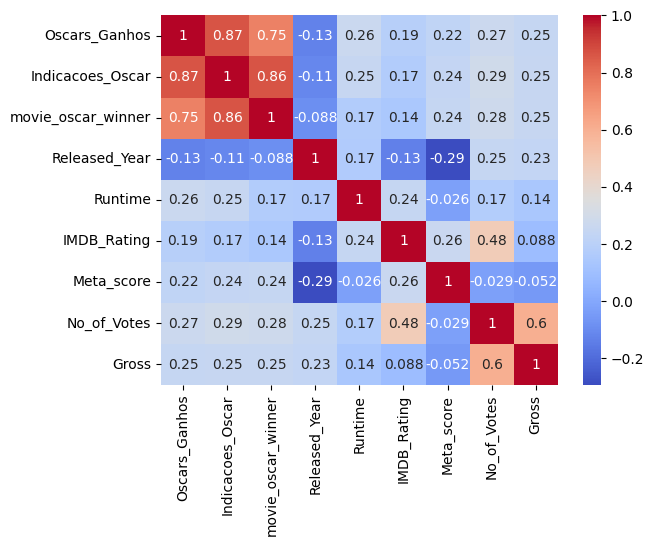

In [61]:
#Vamos calcular a correlação com gross
correlation = df_oscar.corr()
correlation['IMDB_Rating'].sort_values(ascending=False)
#Vamos gerar um heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Oscars Ganhos e indicações oscars apresentam uma forte multicolinearidade.

In [62]:
# Dataset com top 10 de diretores e atores mais frequentes
X = df_oscar.drop(['IMDB_Rating'] , axis=1)
y = df_oscar['IMDB_Rating']



params = {
    'objective': 'reg:squarederror',
    'max_depth': 8,
    'learning_rate': 0.02,
    'n_estimators': 600,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0.03,
    'random_state': 42
}

# Dividir os dados normalizados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')
#modelo6

Mean Squared Error: 0.0323459618200779
R² Score: 0.5280975753430779
Mean Absolute Error: 0.14009504222869876
MAPE: 1.76%
Accuracy: 98.24 %


In [63]:
oscar_actors.info()
oscar_actors.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10877 non-null  object
 7   winner_desloc  645 non-null    object
 8   Unnamed: 8     5 non-null      object
dtypes: int64(3), object(6)
memory usage: 765.8+ KB


year_film            0
year_ceremony        0
ceremony             0
category             0
name                 5
film               319
winner              12
winner_desloc    10244
Unnamed: 8       10884
dtype: int64

Foi verificado que muitos dos valores nulos estão deslocados uma coluna para direita, vamos relocar.

In [64]:
# Condição para atualização
condition = ~oscar_actors['winner'].isin(['true', 'false','True','False'])

# Atualização dos valores
oscar_actors.loc[condition, 'winner'] = oscar_actors.loc[condition, 'winner_desloc']

# Converter 'winner' para booleano
oscar_actors['winner'] = oscar_actors['winner'].apply(lambda x: True if x == 'True' else False)

# Dropar colunas 'winner_desloc' e 'Unnamed: 8'
oscar_actors.drop(['winner_desloc', 'Unnamed: 8'], axis=1, inplace=True)

def lower_strings(s):
    if isinstance(s, str):
        return s.lower()
    return s

# Aplicar a função a todas as colunas de tipo object
oscar_actors = oscar_actors.applymap(lower_strings)
#Vamos dropar as colunas year_film	year_ceremony	ceremony
oscar_actors.drop(['year_film', 'year_ceremony', 'ceremony'], axis=1, inplace=True)

In [65]:
oscar_actors.info()
oscar_actors.isnull().sum()
oscar_actors.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10889 non-null  object
 1   name      10884 non-null  object
 2   film      10570 non-null  object
 3   winner    10889 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 266.0+ KB


In [66]:
oscar_actors.head(20)

category                     name  \
0                          actor      richard barthelmess   
1                          actor            emil jannings   
2                        actress           louise dresser   
3                        actress             janet gaynor   
4                        actress           gloria swanson   
5                  art direction            rochus gliese   
6                  art direction  william cameron menzies   
7                  art direction             harry oliver   
8                 cinematography            george barnes   
9                 cinematography           charles rosher   
10                cinematography              karl struss   
11    directing (comedy picture)          lewis milestone   
12    directing (comedy picture)                ted wilde   
13  directing (dramatic picture)            frank borzage   
14  directing (dramatic picture)           herbert brenon   
15  directing (dramatic picture)               king vidor   
17           engineering effects              roy pomeroy   
19           outstanding picture        the caddo company   
20           outstanding picture                      fox   
21           outstanding picture   paramount famous lasky   

                   film  winner  
0             the noose   False  
1      the last command    True  
2       a ship comes in   False  
3            7th heaven    True  
4        sadie thompson   False  
5               sunrise   False  
6              the dove    True  
7            7th heaven   False  
8      the devil dancer   False  
9               sunrise    True  
10              sunrise    True  
11  two arabian knights    True  
12               speedy   False  
13           7th heaven    True  
14      sorrell and son   False  
15            the crowd   False  
17                wings    True  
19           the racket   False  
20           7th heaven   False  
21                wings    True

In [67]:
allowed_categories = ['actor', 'actress', 'directing']

# Filtrar o DataFrame para manter apenas os registros com 'category' permitido
oscar_actors_filtered = oscar_actors[oscar_actors['category'].str.lower().str.split().str[0].isin(allowed_categories)]
# Filtrar oscar_actors para obter apenas os vencedores
oscar_winners = oscar_actors_filtered[oscar_actors_filtered['winner']]

df_new_categorics = df_new_categorics.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
oscar_winners['name'] = oscar_winners['name'].str.strip().str.lower()

# Obter conjunto de nomes únicos em oscar_winners para comparação eficiente
oscar_winner_names = set(oscar_winners['name'])

# Função para verificar se algum nome está em oscar_winners
def check_previous_winner(row):
    for col in ['Director', 'Star1', 'Star2', 'Star3', 'Star4']:
        if row[col] in oscar_winner_names:
            return True
    return False

# Aplicar a função a cada linha de df_new_categorical
df_new_categorics['previous_oscar_winner'] = df_new_categorics.apply(check_previous_winner, axis=1)




<ipython-input-67-040bef2cb750>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_winners['name'] = oscar_winners['name'].str.strip().str.lower()


In [68]:
df_new_categorics
df_new_categorics = df_new_categorics.drop(['Series_Title', 'Film_Normalizado'], axis=1)

In [69]:
df_new_categorics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Certificate               999 non-null    object
 1   Genre                     999 non-null    object
 2   Overview                  999 non-null    object
 3   Director                  999 non-null    object
 4   Star1                     999 non-null    object
 5   Star2                     999 non-null    object
 6   Star3                     999 non-null    object
 7   Star4                     999 non-null    object
 8   Series_Title_Normalizado  999 non-null    object
 9   Oscars_Ganhos             999 non-null    int64 
 10  Indicacoes_Oscar          999 non-null    int64 
 11  movie_oscar_winner        999 non-null    int64 
 12  previous_oscar_winner     999 non-null    bool  
dtypes: bool(1), int64(3), object(9)
memory usage: 94.8+ KB


In [70]:
# Calcular a contagem de ganhadores e não ganhadores do Oscar
counts = df_new_categorics['previous_oscar_winner'].value_counts()

# Calcular a porcentagem
percentage_winners = (counts[True] / df_new_categorics.shape[0]) * 100
percentage_non_winners = (counts[False] / df_new_categorics.shape[0]) * 100

print(f'Porcentagem de ganhadores do Oscar no nosso dataset: {percentage_winners:.2f}%')
print(f'Porcentagem de não ganhadores do Oscar no nosso dataset: {percentage_non_winners:.2f}%')

Porcentagem de ganhadores do Oscar no nosso dataset: 48.25%
Porcentagem de não ganhadores do Oscar no nosso dataset: 51.75%


In [71]:
df_new_categorics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Certificate               999 non-null    object
 1   Genre                     999 non-null    object
 2   Overview                  999 non-null    object
 3   Director                  999 non-null    object
 4   Star1                     999 non-null    object
 5   Star2                     999 non-null    object
 6   Star3                     999 non-null    object
 7   Star4                     999 non-null    object
 8   Series_Title_Normalizado  999 non-null    object
 9   Oscars_Ganhos             999 non-null    int64 
 10  Indicacoes_Oscar          999 non-null    int64 
 11  movie_oscar_winner        999 non-null    int64 
 12  previous_oscar_winner     999 non-null    bool  
dtypes: bool(1), int64(3), object(9)
memory usage: 94.8+ KB


In [72]:
#vamos fazer uma cópria de DF para inputar a mediana
df_median = df_numerical.copy()

df_gross_median = df_median['Gross'].median()
df_meta_median = df_median['Meta_score'].median()


print(df_gross_median)
print(df_meta_median)
#Vamos preencher valores nulos de gross e meta_score pela mediana
df_median['Gross'] = df_median['Gross'].fillna(df_gross_median)
df_median['Meta_score'] = df_median['Meta_score'].fillna(df_meta_median)

23457439.5
79.0


In [73]:
#vamos concatenar nosso data set com o dataset numérico
df_new_categorics = df_new_categorics.select_dtypes(include=['number' , 'boolean'])

df_categorics_num_oscar = pd.concat([df_new_categorics, df_median], axis=1)

<Axes: >

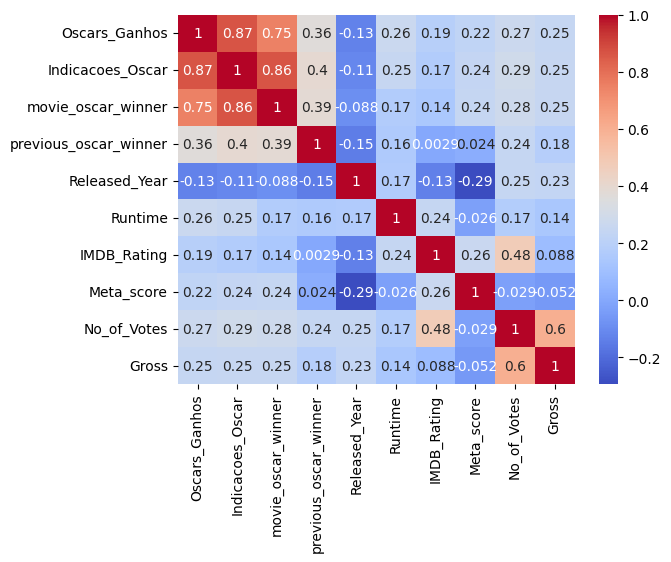

In [74]:
#Vamos calcular a correlação com gross
correlation = df_categorics_num_oscar.corr()
correlation['IMDB_Rating'].sort_values(ascending=False)
#Vamos gerar um heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [75]:
# Dataset com top 10 de diretores e atores mais frequentes
X = df_categorics_num_oscar.drop(['IMDB_Rating'] , axis=1)
y = df_categorics_num_oscar['IMDB_Rating']

params = {
    'objective': 'reg:squarederror',
    'max_depth': 8,
    'learning_rate': 0.02,
    'n_estimators': 600,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0.03,
    'random_state': 42
}

# Dividir os dados normalizados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')
#modelo6

Mean Squared Error: 0.03207678685276501
R² Score: 0.532024628755138
Mean Absolute Error: 0.13978295660018922
MAPE: 1.75%
Accuracy: 98.25 %


Nosso modelo de regressão teve um desempenho levemente maior com o dataset original com as features numéricas concatenado com os datasets de filmes, atores e diretores ganhadores do oscar.

Vamos concatenar o dataset com as features de gênero e classificação para verificar o desempenho.

In [76]:
df_categorics_num_oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Oscars_Ganhos          999 non-null    int64  
 1   Indicacoes_Oscar       999 non-null    int64  
 2   movie_oscar_winner     999 non-null    int64  
 3   previous_oscar_winner  999 non-null    bool   
 4   Released_Year          999 non-null    int64  
 5   Runtime                999 non-null    int64  
 6   IMDB_Rating            999 non-null    float64
 7   Meta_score             999 non-null    float64
 8   No_of_Votes            999 non-null    int64  
 9   Gross                  999 non-null    float64
dtypes: bool(1), float64(3), int64(6)
memory usage: 71.3 KB


In [77]:
categorics_nlp_actors_top10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 67 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   action                                     999 non-null    int64  
 1   adventure                                  999 non-null    int64  
 2   animation                                  999 non-null    int64  
 3   biography                                  999 non-null    int64  
 4   comedy                                     999 non-null    int64  
 5   crime                                      999 non-null    int64  
 6   drama                                      999 non-null    int64  
 7   family                                     999 non-null    int64  
 8   fantasy                                    999 non-null    int64  
 9   film-noir                                  999 non-null    int64  
 10  history                   

In [78]:
# Identificar colunas comuns entre os dois DataFrames
common_columns = categorics_nlp_actors_top10.columns.intersection(df_categorics_num_oscar.columns)

# Remover colunas comuns de df_categorics_num_oscar
df_categorics_num_oscar_unique = df_categorics_num_oscar.drop(columns=common_columns)

# Concatenar os DataFrames sem duplicar colunas
concatenated_df = pd.concat([categorics_nlp_actors_top10, df_categorics_num_oscar_unique], axis=1)

In [79]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 71 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   action                                     999 non-null    int64  
 1   adventure                                  999 non-null    int64  
 2   animation                                  999 non-null    int64  
 3   biography                                  999 non-null    int64  
 4   comedy                                     999 non-null    int64  
 5   crime                                      999 non-null    int64  
 6   drama                                      999 non-null    int64  
 7   family                                     999 non-null    int64  
 8   fantasy                                    999 non-null    int64  
 9   film-noir                                  999 non-null    int64  
 10  history                   

In [80]:


# Ordenar as correlações com IMDB_Rating em ordem decrescente de valor absoluto
correlation_matrix = concatenated_df.corr()
sorted_correlations = correlation_matrix['IMDB_Rating'].abs().sort_values(ascending=False)

# Selecionar as top 40 maiores correlações absolutas, excluindo a própria 'IMDB_Rating'
top_40_correlations = sorted_correlations.index[1:71]  # Exclui 'IMDB_Rating' e pega as próximas 40 melhores correlações

# Criar um DataFrame para armazenar as top 40 correlações
top_40_correlation_df = correlation_matrix.loc[top_40_correlations, ['IMDB_Rating']]
top_40_correlation_df = top_40_correlation_df.reset_index()
top_40_correlation_df.columns = ['Feature', 'Correlation']

# Ordenar pelo valor absoluto das correlações (se desejar)
top_40_correlation_df['Abs_Correlation'] = top_40_correlation_df['Correlation'].abs()
top_40_correlation_df = top_40_correlation_df.sort_values(by='Abs_Correlation', ascending=False).drop('Abs_Correlation', axis=1)

# Exibir as top 40 correlações com IMDB_Rating
print(top_40_correlation_df)

# Selecionando as top 40 features com maior correlação absoluta
top_features = top_40_correlation_df['Feature'].tolist()

# Modelo de regressão XGBoost
X = concatenated_df[top_features]
y = concatenated_df['IMDB_Rating']

# Definir os parâmetros iniciais para o XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.06,
    'n_estimators': 80,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0,
    'random_state': 42

}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Definir o espaço de parâmetros para a busca aleatória
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0],
    'gamma': [0, 0.1, 0.3]
}

# Criar o modelo XGBoost
regressor = xgb.XGBRegressor(**params)

# Instanciar o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_dist, n_iter=50,
                                   scoring='neg_mean_squared_error', cv=3, random_state=42, verbose=1)

# Realizar a busca aleatória nos dados
random_search.fit(X_train, y_train)

# Mostrar os melhores parâmetros encontrados
print(f"Melhores parâmetros encontrados: {random_search.best_params_}")

# Treinar o modelo com os melhores parâmetros encontrados
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error no teste: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score no teste: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error no teste: {mae}')

# Calculando o MAPE
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print(f'Accuracy: {round(accuracy, 2)}%')

                  Feature  Correlation
0             No_of_Votes     0.479308
1              Meta_score     0.261010
2                 Runtime     0.242751
3           Oscars_Ganhos     0.187774
4        Star_elijah wood     0.171824
..                    ...          ...
65              adventure     0.007430
66                history     0.005035
67  previous_oscar_winner     0.002864
68                 action     0.001294
69                musical    -0.000430

[70 rows x 2 columns]
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores parâmetros encontrados: {'subsample': 0.7, 'reg_lambda': 10.0, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
Mean Squared Error no teste: 0.03273865078069816
R² Score no teste: 0.522368548836354
Mean Absolute Error no teste: 0.1412326216697693
MAPE: 1.77%
Accuracy: 98.23%


In [83]:
# Ordenar as correlações com IMDB_Rating em ordem decrescente de valor absoluto
correlation_matrix = concatenated_df.corr()
sorted_correlations = correlation_matrix['IMDB_Rating'].abs().sort_values(ascending=False)

# Selecionar as top 120 maiores correlações absolutas, excluindo a própria 'IMDB_Rating'
top_120_correlations = sorted_correlations.index[1:71]  # Exclui 'IMDB_Rating' e pega as próximas 120 melhores correlações

# Criar um DataFrame para armazenar as top 120 correlações
top_120_correlation_df = correlation_matrix.loc[top_120_correlations, ['IMDB_Rating']]
top_120_correlation_df = top_120_correlation_df.reset_index()
top_120_correlation_df.columns = ['Feature', 'Correlation']

# Ordenar pelo valor absoluto das correlações (se desejar)
top_120_correlation_df['Abs_Correlation'] = top_120_correlation_df['Correlation'].abs()
top_120_correlation_df = top_120_correlation_df.sort_values(by='Abs_Correlation', ascending=False).drop('Abs_Correlation', axis=1)

# Exibir as top 120 correlações com IMDB_Rating
print(top_120_correlation_df)

# Selecionando as top 120 features com maior correlação absoluta
top_features = top_120_correlation_df['Feature'].tolist()

# Preparar dados
X = concatenated_df[top_features]
y = concatenated_df['IMDB_Rating']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Função para treinar e avaliar o modelo
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(100 * (abs(y_pred - y_test) / y_test))
    accuracy = 100 - mape

    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Squared Error: {mse}')
    print(f'R² Score: {r2}')
    print(f'Mean Absolute Error: {mae}')
    print(f'MAPE: {mape:.2f}%')
    print(f'Accuracy: {round(accuracy, 2)}%')
    print()

# Modelos de regressão
models = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)
}

# Treinar e avaliar cada modelo
for model_name, model in models.items():
    train_and_evaluate(model, X_train, X_test, y_train, y_test)


                  Feature  Correlation
0             No_of_Votes     0.479308
1              Meta_score     0.261010
2                 Runtime     0.242751
3           Oscars_Ganhos     0.187774
4        Star_elijah wood     0.171824
..                    ...          ...
65              adventure     0.007430
66                history     0.005035
67  previous_oscar_winner     0.002864
68                 action     0.001294
69                musical    -0.000430

[70 rows x 2 columns]
Model: RandomForestRegressor
Mean Squared Error: 0.033538299999999965
R² Score: 0.510702288684235
Mean Absolute Error: 0.14457999999999996
MAPE: 1.81%
Accuracy: 98.19%

Model: GradientBoostingRegressor
Mean Squared Error: 0.03231566047629319
R² Score: 0.528539648380878
Mean Absolute Error: 0.14372255338905357
MAPE: 1.80%
Accuracy: 98.2%

Model: AdaBoostRegressor
Mean Squared Error: 0.04289630050488991
R² Score: 0.3741763398575375
Mean Absolute Error: 0.1706391976289605
MAPE: 2.16%
Accuracy: 97.84%



Nosso modelo com Gradiente XGBoost apresentou melhores resultados comparado ao AdaBoost, GradienteBoost e RandomForest


Porém nosso modelo com a combinação do dataset com onehot de diretores , atores , genre e certificate não apresentou melhores resultados do que o modelo com as features numéricas do dataset original combinado com os ganhadores do oscars.


Vamos retomar com nosso modelo com melhor desempenho e verificar o desempenho dele com o input do filme a ser predito.

Também vamos serializar o modelo.


{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}

In [84]:
# Dataset com top 10 de diretores e atores mais frequentes
X = df_categorics_num_oscar.drop(['IMDB_Rating'] , axis=1)
y = df_categorics_num_oscar['IMDB_Rating']

params = {
    'objective': 'reg:squarederror',
    'max_depth': 8,
    'learning_rate': 0.02,
    'n_estimators': 600,
    'subsample': 0.5,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.01,
    'reg_lambda': 1.0,
    'gamma': 0.03,
    'random_state': 42
}

# Dividir os dados normalizados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')


Mean Squared Error: 0.03207678685276501
R² Score: 0.532024628755138
Mean Absolute Error: 0.13978295660018922
MAPE: 1.75%
Accuracy: 98.25 %


In [85]:
# Separar as features e o alvo
X = df_categorics_num_oscar.drop(['IMDB_Rating'], axis=1)
y = df_categorics_num_oscar['IMDB_Rating']

# Melhores parâmetros avaliados com grid search
params = {
    'objective': 'reg:squarederror',
    'subsample': 0.5,
    'reg_lambda': 1.0,
    'reg_alpha': 0.01,
    'n_estimators': 100,
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.1,
    'colsample_bytree': 1.0
}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')

# Função para verificar se o diretor ou atores são vencedores do Oscar
def check_oscar_winners(director, stars):
    oscar_status = {
        'Director_Won_Oscar': 0,
        'Star1_Won_Oscar': 0,
        'Star2_Won_Oscar': 0,
        'Star3_Won_Oscar': 0,
        'Star4_Won_Oscar': 0
    }

    if director.lower() in oscar_winner_names:
        oscar_status['Director_Won_Oscar'] = 1
    for i, star in enumerate(stars):
        if star.lower() in oscar_winner_names:
            oscar_status[f'Star{i+1}_Won_Oscar'] = 1

    return oscar_status

# Função para fazer a previsão de um novo input
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])

    # Converter para minúsculas
    input_df['Series_Title'] = input_df['Series_Title'].str.lower()
    input_df['Director'] = input_df['Director'].str.lower()
    input_df['Star1'] = input_df['Star1'].str.lower()
    input_df['Star2'] = input_df['Star2'].str.lower()
    input_df['Star3'] = input_df['Star3'].str.lower()
    input_df['Star4'] = input_df['Star4'].str.lower()

    # Realizar as mesmas transformações aplicadas ao conjunto de treinamento
    input_df['Gross'] = input_df['Gross'].str.replace(',', '').astype(float)
    input_df['Runtime'] = input_df['Runtime'].str.replace(' min', '').astype(int)
    input_df['Meta_score'] = input_df['Meta_score'].astype(float)
    input_df['Released_Year'] = input_df['Released_Year'].astype(int)

    # Verificar se o diretor e estrelas são vencedores do Oscar
    oscar_status = check_oscar_winners(input_df['Director'].values[0],
                                       [input_df['Star1'].values[0], input_df['Star2'].values[0],
                                        input_df['Star3'].values[0], input_df['Star4'].values[0]])
    print(oscar_status)
    for key, value in oscar_status.items():
        input_df[key] = value

    # Assegurar que todas as colunas necessárias estão presentes e preencher com 0 se não estiverem
    for column in X.columns:
        if column not in input_df:
            input_df[column] = 0

    input_df = input_df[X.columns]

    return scaler.transform(input_df)

# Novo input teste oscar
new_input = {
    'Series_Title': 'Women Talking',
    'Released_Year': '2019',
    'Certificate': 'PG',
    'Runtime': '104 min',
    'Genre': 'Animation, Action, Adventure',
    'Overview': 'When Hiccup discovers Toothless isn\'t the only Night Fury, he must seek "The Hidden World", a secret Dragon Utopia before a hired tyrant named Grimmel finds it first.',
    'Meta_score': 71.0,
    'Director': 'Lewis Milestone',
    'Star1': 'Emil Jannings',
    'Star2': 'Janet Gaynor',
    'Star3': 'Warner Baxter',
    'Star4': 'Fredric March',
    'No_of_Votes': 172594,
    'Gross': '160,799,505'
}

# Preprocessar o novo input
processed_input = preprocess_input(new_input)

# Fazer a previsão
prediction = regressor.predict(processed_input)
print(f'Predicted IMDB Rating: {prediction[0]}')

#Verificando se o código para pegar o input e fazer a verificação se o filme ou artista já ganharam oscar


Mean Squared Error: 0.03210785932190307
R² Score: 0.5315713055982045
Mean Absolute Error: 0.14130054235458378
MAPE: 1.77%
Accuracy: 98.23 %
{'Director_Won_Oscar': 1, 'Star1_Won_Oscar': 1, 'Star2_Won_Oscar': 1, 'Star3_Won_Oscar': 1, 'Star4_Won_Oscar': 1}
Predicted IMDB Rating: 7.823731899261475


In [86]:
##MOdelo usado
# Separar as features e o alvo
X = df_categorics_num_oscar.drop(['IMDB_Rating'], axis=1)
y = df_categorics_num_oscar['IMDB_Rating']

# Melhores parâmetros avaliados com grid search
params = {
    'objective': 'reg:squarederror',
    'subsample': 0.5,
    'reg_lambda': 1.0,
    'reg_alpha': 0.01,
    'n_estimators': 100,
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.1,
    'colsample_bytree': 1.0
}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')

# Lista fictícia de títulos de filmes que ganharam o Oscar (exemplo)
oscar_winner_titles = []

# Função para verificar se o diretor ou atores são vencedores do Oscar
def check_oscar_winners(director, stars):
    oscar_status = {
        'Director_Won_Oscar': 0,
        'Star1_Won_Oscar': 0,
        'Star2_Won_Oscar': 0,
        'Star3_Won_Oscar': 0,
        'Star4_Won_Oscar': 0
    }

    if director.lower() in oscar_winner_names:
        oscar_status['Director_Won_Oscar'] = 1
    for i, star in enumerate(stars):
        if star.lower() in oscar_winner_names:
            oscar_status[f'Star{i+1}_Won_Oscar'] = 1

    return oscar_status

# Função para fazer a previsão de um novo input
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])

    # Converter para minúsculas
    input_df['Series_Title'] = input_df['Series_Title'].str.lower()
    input_df['Director'] = input_df['Director'].str.lower()
    input_df['Star1'] = input_df['Star1'].str.lower()
    input_df['Star2'] = input_df['Star2'].str.lower()
    input_df['Star3'] = input_df['Star3'].str.lower()
    input_df['Star4'] = input_df['Star4'].str.lower()

    # Extrair o valor numérico de Runtime e converter para int
    input_df['Runtime'] = input_df['Runtime'].str.replace(' min', '').astype(int)

    # Remover vírgulas de Gross e converter para float
    input_df['Gross'] = input_df['Gross'].str.replace(',', '').astype(float)

    # Verificar se o diretor e estrelas são vencedores do Oscar
    oscar_status = check_oscar_winners(input_df['Director'].values[0],
                                       [input_df['Star1'].values[0], input_df['Star2'].values[0],
                                        input_df['Star3'].values[0], input_df['Star4'].values[0]])
    print(oscar_status)
    for key, value in oscar_status.items():
        input_df[key] = value

    # Verificar se o título do filme está na lista de filmes que ganharam o Oscar
    #input_df['movie_oscar_winner'] = (input_df['Series_Title'].isin(oscar_winner_titles)).astype(int)
    # Verificar se o Series_Title está na lista de títulos de filmes vencedores do Oscar
    input_df['movie_oscar_winner'] = input_df['Series_Title'].isin(df_new_categorical_oscars.loc[df_new_categorical_oscars['movie_oscar_winner'] == 1, 'Series_Title_Normalizado']).astype(int)

    # Adicionar a coluna previous_oscar_winner com base nos resultados da verificação
    input_df['previous_oscar_winner'] = any(list(oscar_status.values()))

    # Assegurar que todas as colunas necessárias estão presentes e preencher com 0 se não estiverem
    for column in X.columns:
        if column not in input_df:
            input_df[column] = 0

    input_df = input_df[X.columns]
    print("Processed Input:")
    print(input_df)
    return scaler.transform(input_df)

# Novo input teste oscar
new_input = {
  'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'


}

# Preprocessar o novo input
processed_input = preprocess_input(new_input)

# Fazer a previsão
prediction = regressor.predict(processed_input)
print(f'Predicted IMDB Rating: {prediction[0]}')


Mean Squared Error: 0.03210785932190307
R² Score: 0.5315713055982045
Mean Absolute Error: 0.14130054235458378
MAPE: 1.77%
Accuracy: 98.23 %
{'Director_Won_Oscar': 0, 'Star1_Won_Oscar': 1, 'Star2_Won_Oscar': 1, 'Star3_Won_Oscar': 0, 'Star4_Won_Oscar': 0}
Processed Input:
   Oscars_Ganhos  Indicacoes_Oscar  movie_oscar_winner  previous_oscar_winner  \
0              0                 0                   0                   True   

  Released_Year  Runtime  Meta_score  No_of_Votes       Gross  
0          1994      142        80.0      2343110  28341469.0  
Predicted IMDB Rating: 8.738204956054688


In [87]:
# Copiar o DataFrame original
categorics_nlp_actors_top10 = categorics.copy()

# Concatenar com as colunas numéricas
categorics_nlp_actors_top10 = pd.concat([categorics_nlp_actors_top10, df_categorics_num], axis=1)

# Calcular a média das notas de IMDb para diretores
directors_mean_rating = categorics_nlp_actors_top10.groupby('Director')['IMDB_Rating'].mean()
top_10_directors = directors_mean_rating.nlargest(20).index

# Calcular a média das notas de IMDb para atores
actors = categorics_nlp_actors_top10[['Star1', 'Star2', 'Star3']].melt(value_name='Actor').drop('variable', axis=1)
actors_avg_rating = actors.join(categorics_nlp_actors_top10[['IMDB_Rating']]).groupby('Actor')['IMDB_Rating'].mean()
top_10_actors = actors_avg_rating.nlargest(20).index

# Adicionar colunas dummies para os top 10 diretores
for director in top_10_directors:
    categorics_nlp_actors_top10[f'Director_{director}'] = (categorics_nlp_actors_top10['Director'] == director).astype(int)

# Adicionar colunas dummies para os top 10 atores
for actor in top_10_actors:
    categorics_nlp_actors_top10[f'Star_{actor}'] = ((categorics_nlp_actors_top10['Star1'] == actor) |
                                                    (categorics_nlp_actors_top10['Star2'] == actor) |
                                                    (categorics_nlp_actors_top10['Star3'] == actor)).astype(int)

# Excluir as colunas originais de diretores e atores
categorics_nlp_actors_top10 = categorics_nlp_actors_top10.drop(columns=['Director', 'Star1', 'Star2', 'Star3'])

# Selecionar apenas colunas numéricas
categorics_nlp_actors_top10 = categorics_nlp_actors_top10.select_dtypes(include=['number'])

# Ordenar as correlações com IMDB_Rating em ordem decrescente de valor absoluto
correlation_matrix = categorics_nlp_actors_top10.corr()
sorted_correlations = correlation_matrix['IMDB_Rating'].abs().sort_values(ascending=False)

# Selecionar as top 15 maiores correlações absolutas, excluindo a própria 'IMDB_Rating'
top_15_correlations = sorted_correlations.index[1:16]  # Exclui 'IMDB_Rating' e pega as próximas 15 melhores correlações

# Criar um DataFrame para armazenar as top 15 correlações
top_15_correlation_df = correlation_matrix.loc[top_15_correlations, ['IMDB_Rating']]
top_15_correlation_df = top_15_correlation_df.reset_index()
top_15_correlation_df.columns = ['Feature', 'Correlation']

# Exibir as top 15 correlações com IMDB_Rating
print(top_15_correlation_df)

# Selecionando as top 15 features com maior correlação absoluta
top_features = top_15_correlation_df['Feature'].tolist()

# Modelo de regressão XGBoost
X = categorics_nlp_actors_top10[top_features]
y = categorics_nlp_actors_top10['IMDB_Rating']

# # Melhores parâmetros avaliados com grid search
params = {
    'objective': 'reg:squarederror',
    'subsample': 0.5,
    'reg_lambda': 1.0,
    'reg_alpha': 0.01,
    'n_estimators': 100,
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.1,
    'colsample_bytree': 1.0
}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)



# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error no teste: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score no teste: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error no teste: {mae}')

# Calculando o MAPE
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print(f'Accuracy: {round(accuracy, 2)}%')


# Função para fazer a previsão de um novo input
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])

    # Realizar as mesmas transformações aplicadas ao conjunto de treinamento
    input_df['Gross'] = input_df['Gross'].str.replace(',', '').astype(float)
    input_df['Runtime'] = input_df['Runtime'].str.replace(' min', '').astype(int)
    input_df['Meta_score'] = input_df['Meta_score'].astype(float)
    input_df['Released_Year'] = input_df['Released_Year'].astype(int)

    # Adicionar colunas dummies para os top 10 diretores
    for director in top_10_directors:
        input_df[f'Director_{director}'] = (input_df['Director'] == director).astype(int)

    # Adicionar colunas dummies para os top 10 atores
    for actor in top_10_actors:
        input_df[f'Star_{actor}'] = ((input_df['Star1'] == actor) |
                                     (input_df['Star2'] == actor) |
                                     (input_df['Star3'] == actor)).astype(int)

    # Excluir as colunas originais de diretores e atores
    input_df = input_df.drop(columns=['Director', 'Star1', 'Star2', 'Star3'])

    # Assegurar que todas as colunas necessárias estão presentes
    for column in X.columns:
        if column not in input_df:
            input_df[column] = 0

    input_df = input_df[X.columns].astype(float)

    return input_df

# Novo input
new_input = {
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'

}

# Preprocessar o novo input
processed_input = preprocess_input(new_input)

# Fazer a previsão
prediction = regressor.predict(processed_input)
print(f'Predicted IMDB Rating: {prediction[0]}')


                          Feature  Correlation
0                     No_of_Votes     0.479308
1                      Meta_score     0.261010
2                         Runtime     0.242751
3                Star_elijah wood     0.171824
4      Director_christopher nolan     0.169873
5                   Released_Year    -0.133355
6                Star_mark hamill     0.118048
7   Director_francis ford coppola     0.117806
8              Star_marlon brando     0.111140
9              Star_john travolta     0.110734
10          Director_milos forman     0.090852
11                         comedy    -0.090209
12                          Gross     0.088139
13        Director_irvin kershner     0.087472
14        Director_lana wachowski     0.087472
Mean Squared Error no teste: 0.03339910788627613
R² Score no teste: 0.5127329933615227
Mean Absolute Error no teste: 0.14445956707000734
MAPE: 1.81%
Accuracy: 98.19%
Predicted IMDB Rating: 8.63430404663086


In [88]:
# Separar as features e o alvo
X = df_mean.drop('IMDB_Rating', axis=1)
y = df_mean['IMDB_Rating']

# Melhores parâmetros avaliados com grid search
params = {
    'objective': 'reg:squarederror',
    'subsample': 0.7,
    'reg_lambda': 0.1,
    'reg_alpha': 0.1,
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 1.0

}

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score on test: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on test: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')

# Função para fazer a previsão de um novo input
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    # Realizar as mesmas transformações aplicadas ao conjunto de treinamento
    input_df['Gross'] = input_df['Gross'].str.replace(',', '').astype(float)
    input_df['Runtime'] = input_df['Runtime'].str.replace(' min', '').astype(int)
    input_df['Meta_score'] = input_df['Meta_score'].astype(float)
    # Assegurar que todas as colunas necessárias estão presentes
    for column in X.columns:
        if column not in input_df:
            input_df[column] = 0
    input_df = input_df[X.columns]
    return scaler.transform(input_df)

# Novo input
new_input = {
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'

}

# Preprocessar o novo input
processed_input = preprocess_input(new_input)

# Fazer a previsão
prediction = regressor.predict(processed_input)
print(f'Predicted IMDB Rating: {prediction[0]}')


Mean Squared Error on test: 0.03237910359808707
R² Score on test: 0.5276140625791984
Mean Absolute Error on test: 0.14328102159500122
MAPE: 1.80%
Accuracy: 98.2 %
Predicted IMDB Rating: 8.761387825012207


Obtivemos melhores resultados com nosso modelo de regressão treinado com o dataset de ganhadores do oscar. Tivemos um R² Score um pouco maior e um MSE e MAPE um pouco menor. A diferença foi pouca, mas vamos fazer alguns testes com filmes mais recentes que não estão no dataset e verificar qual modelo de aproximou mais do nosso alvo.

In [89]:
############### Modelo Usado ################################
X = df_categorics_num_oscar.drop(['IMDB_Rating'], axis=1)
y = df_categorics_num_oscar['IMDB_Rating']

# Melhores parâmetros avaliados com grid search
params = {
    'objective': 'reg:squarederror',
    'subsample': 0.5,
    'reg_lambda': 1.0,
    'reg_alpha': 0.01,
    'n_estimators': 100,
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.1,
    'colsample_bytree': 1.0
}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')

# Lista fictícia de títulos de filmes que ganharam o Oscar (exemplo)
oscar_winner_titles = []

# Função para verificar se o diretor ou atores são vencedores do Oscar
def check_oscar_winners(director, stars):
    oscar_status = {
        'Director_Won_Oscar': 0,
        'Star1_Won_Oscar': 0,
        'Star2_Won_Oscar': 0,
        'Star3_Won_Oscar': 0,
        'Star4_Won_Oscar': 0
    }

    if director.lower() in oscar_winner_names:
        oscar_status['Director_Won_Oscar'] = 1
    for i, star in enumerate(stars):
        if star.lower() in oscar_winner_names:
            oscar_status[f'Star{i+1}_Won_Oscar'] = 1

    return oscar_status

# Função para fazer a previsão de um novo input
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])

    # Converter para minúsculas
    input_df['Series_Title'] = input_df['Series_Title'].str.lower()
    input_df['Director'] = input_df['Director'].str.lower()
    input_df['Star1'] = input_df['Star1'].str.lower()
    input_df['Star2'] = input_df['Star2'].str.lower()
    input_df['Star3'] = input_df['Star3'].str.lower()
    input_df['Star4'] = input_df['Star4'].str.lower()

    # Extrair o valor numérico de Runtime e converter para int
    input_df['Runtime'] = input_df['Runtime'].str.replace(' min', '').astype(int)

    # Remover vírgulas de Gross e converter para float
    input_df['Gross'] = input_df['Gross'].str.replace(',', '').astype(float)

    # Verificar se o diretor e estrelas são vencedores do Oscar
    oscar_status = check_oscar_winners(input_df['Director'].values[0],
                                       [input_df['Star1'].values[0], input_df['Star2'].values[0],
                                        input_df['Star3'].values[0], input_df['Star4'].values[0]])
    print(oscar_status)
    for key, value in oscar_status.items():
        input_df[key] = value

    # Verificar se o título do filme está na lista de filmes que ganharam o Oscar
    #input_df['movie_oscar_winner'] = (input_df['Series_Title'].isin(oscar_winner_titles)).astype(int)
    # Verificar se o Series_Title está na lista de títulos de filmes vencedores do Oscar
    input_df['movie_oscar_winner'] = input_df['Series_Title'].isin(df_new_categorical_oscars.loc[df_new_categorical_oscars['movie_oscar_winner'] == 1, 'Series_Title_Normalizado']).astype(int)

    # Adicionar a coluna previous_oscar_winner com base nos resultados da verificação
    input_df['previous_oscar_winner'] = any(list(oscar_status.values()))

    # Assegurar que todas as colunas necessárias estão presentes e preencher com 0 se não estiverem
    for column in X.columns:
        if column not in input_df:
            input_df[column] = 0

    input_df = input_df[X.columns]
    print("Processed Input:")
    print(input_df)
    return scaler.transform(input_df)

# Novo input teste oscar
new_input = {
  'Series_Title': 'Guardiões da Galáxia Vol. 3',
    'Released_Year': '2023',
    'Certificate': 'PG-13',
    'Runtime': '150 min',
    'Genre': 'Action, Adventure, Comedy',
    'Overview': 'The Guardians of the Galaxy embark on one last mission to protect one of their own.',
    'Meta_score': 64.0,
    'Director': 'James Gunn',
    'Star1': 'Chris Pratt',
    'Star2': 'Zoe Saldana',
    'Star3': 'Dave Bautista',
    'Star4': 'Vin Diesel',
    'No_of_Votes': 388000,
    'Gross': '1500000000'


}

# Preprocessar o novo input
processed_input = preprocess_input(new_input)

# Fazer a previsão
prediction = regressor.predict(processed_input)
print(f'Predicted IMDB Rating: {prediction[0]}')

Mean Squared Error: 0.03210785932190307
R² Score: 0.5315713055982045
Mean Absolute Error: 0.14130054235458378
MAPE: 1.77%
Accuracy: 98.23 %
{'Director_Won_Oscar': 0, 'Star1_Won_Oscar': 0, 'Star2_Won_Oscar': 0, 'Star3_Won_Oscar': 0, 'Star4_Won_Oscar': 0}
Processed Input:
   Oscars_Ganhos  Indicacoes_Oscar  movie_oscar_winner  previous_oscar_winner  \
0              0                 0                   0                  False   

  Released_Year  Runtime  Meta_score  No_of_Votes         Gross  
0          2023      150        64.0       388000  1.500000e+09  
Predicted IMDB Rating: 7.836304664611816


In [90]:
X = df_mean.drop('IMDB_Rating', axis=1)
y = df_mean['IMDB_Rating']

# Melhores parâmetros avaliados com grid search
params = {
    'objective': 'reg:squarederror',
    'subsample': 0.7,
    'reg_lambda': 0.1,
    'reg_alpha': 0.1,
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 1.0

}

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo nos dados de teste
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score on test: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on test: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')

# Função para fazer a previsão de um novo input
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])
    # Realizar as mesmas transformações aplicadas ao conjunto de treinamento
    input_df['Gross'] = input_df['Gross'].str.replace(',', '').astype(float)
    input_df['Runtime'] = input_df['Runtime'].str.replace(' min', '').astype(int)
    input_df['Meta_score'] = input_df['Meta_score'].astype(float)
    # Assegurar que todas as colunas necessárias estão presentes
    for column in X.columns:
        if column not in input_df:
            input_df[column] = 0
    input_df = input_df[X.columns]
    return scaler.transform(input_df)

# Novo input
new_input = {
 'Series_Title': 'Guardiões da Galáxia Vol. 3',
    'Released_Year': '2023',
    'Certificate': 'PG-13',
    'Runtime': '150 min',
    'Genre': 'Action, Adventure, Comedy',
    'Overview': 'The Guardians of the Galaxy embark on one last mission to protect one of their own.',
    'Meta_score': 64.0,
    'Director': 'James Gunn',
    'Star1': 'Chris Pratt',
    'Star2': 'Zoe Saldana',
    'Star3': 'Dave Bautista',
    'Star4': 'Vin Diesel',
    'No_of_Votes': 388000,
    'Gross': '1500000000'

}

# Preprocessar o novo input
processed_input = preprocess_input(new_input)

# Fazer a previsão
prediction = regressor.predict(processed_input)
print(f'Predicted IMDB Rating: {prediction[0]}')

Mean Squared Error on test: 0.03237910359808707
R² Score on test: 0.5276140625791984
Mean Absolute Error on test: 0.14328102159500122
MAPE: 1.80%
Accuracy: 98.2 %
Predicted IMDB Rating: 8.021060943603516


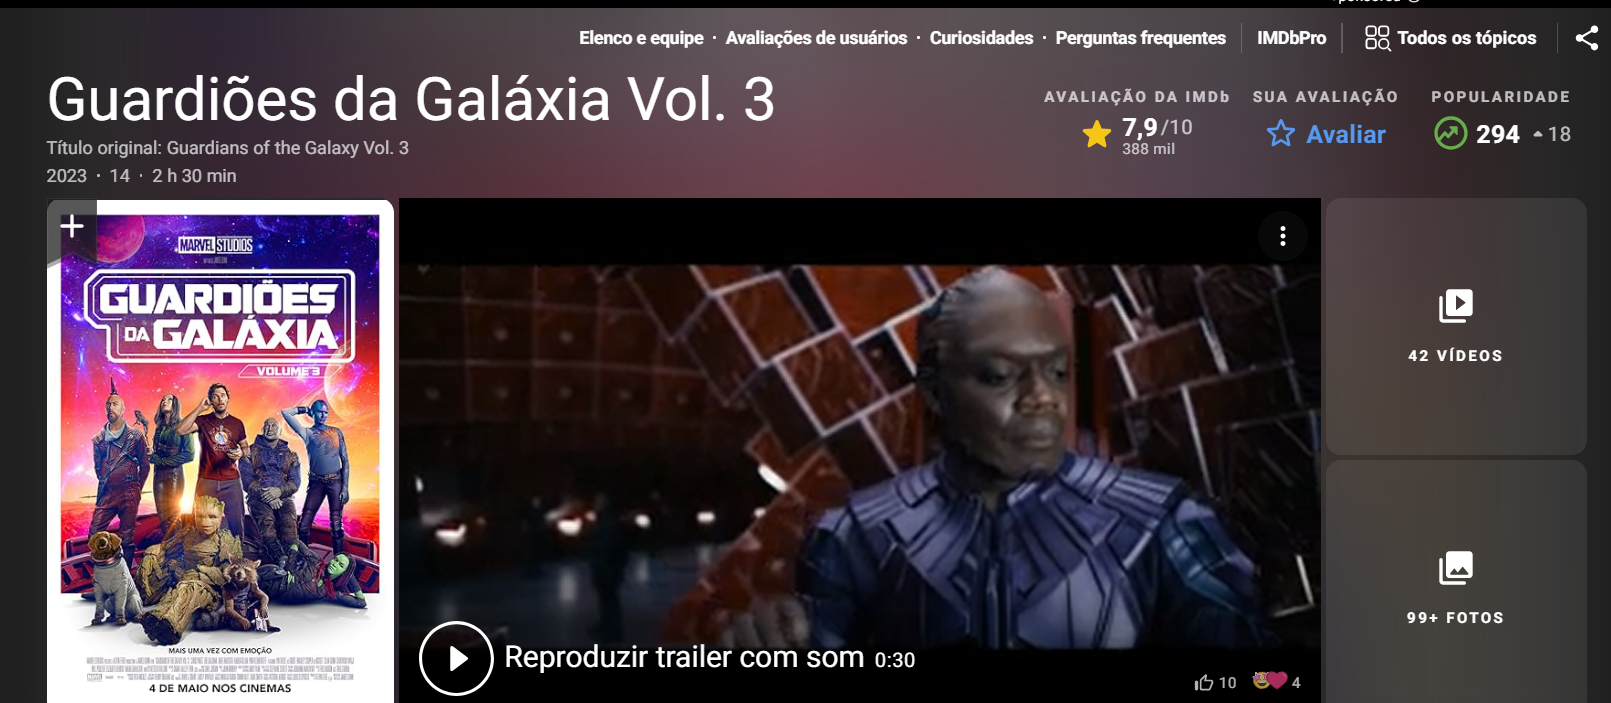

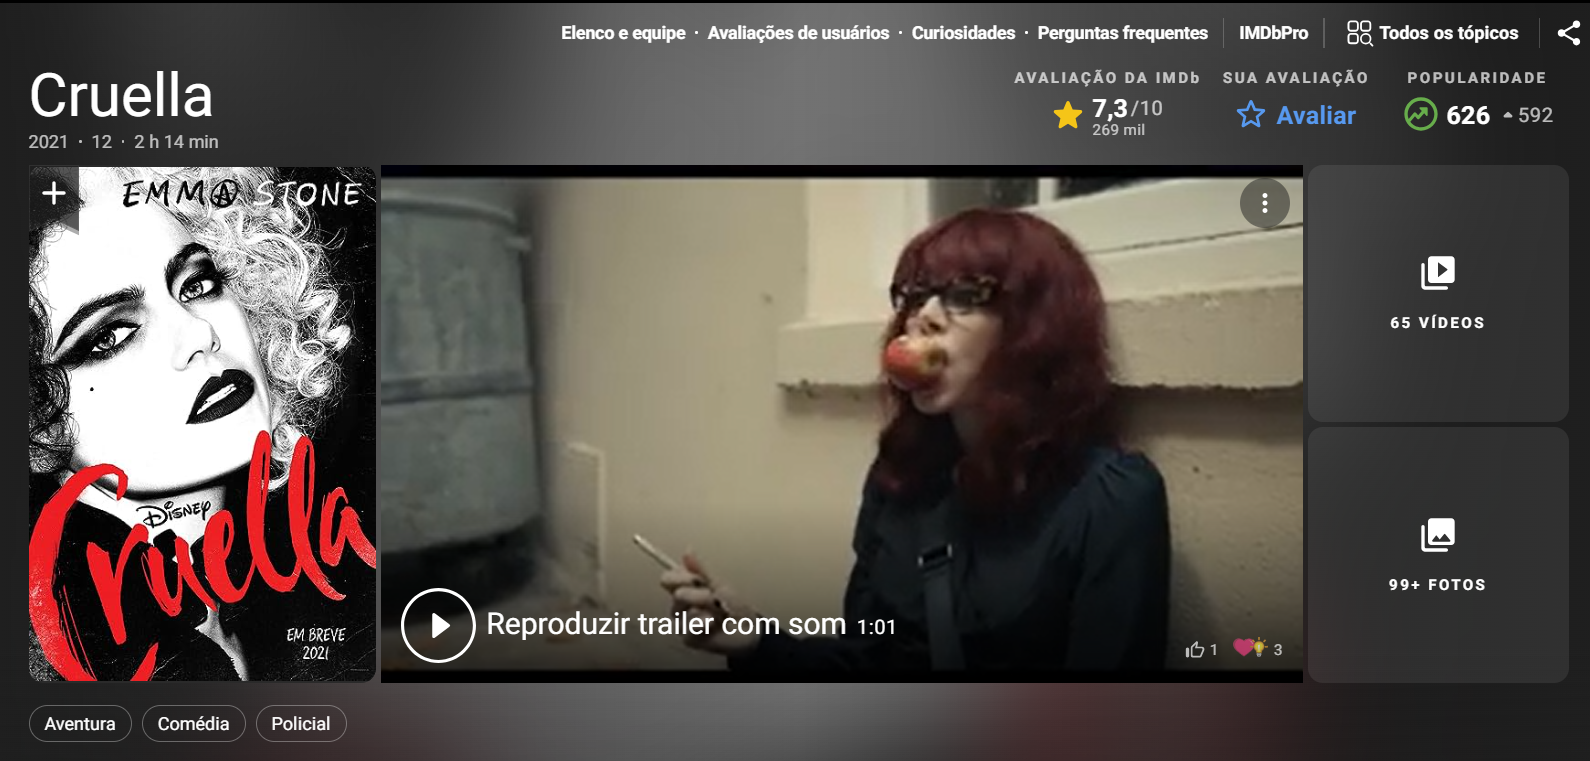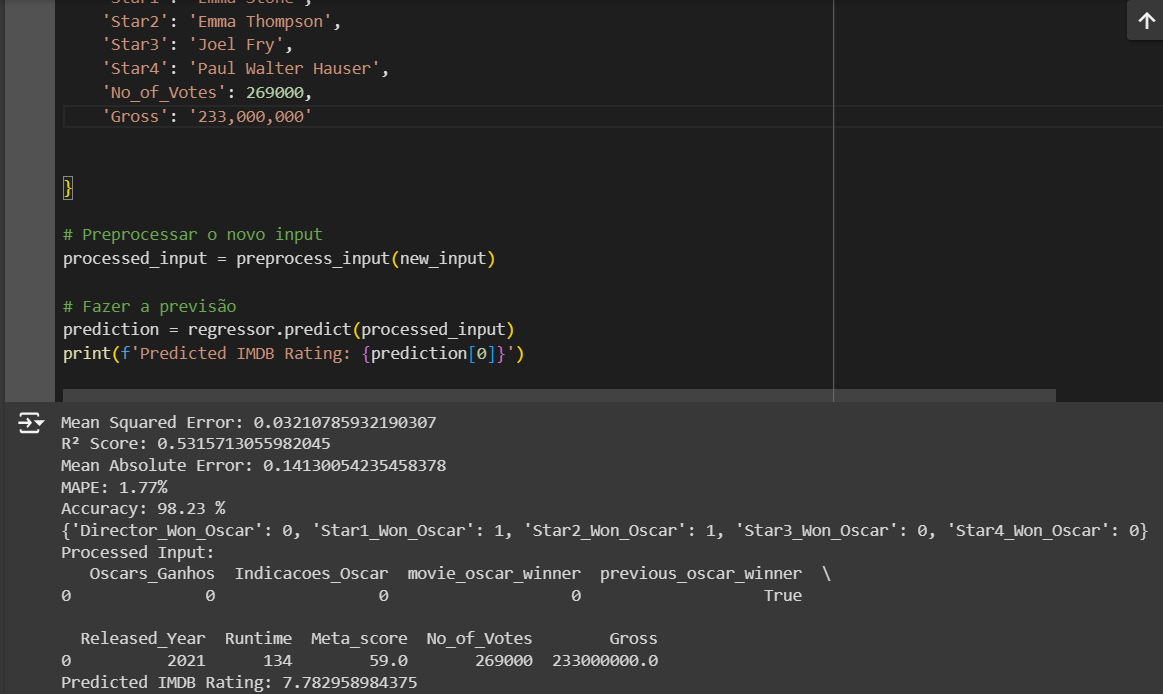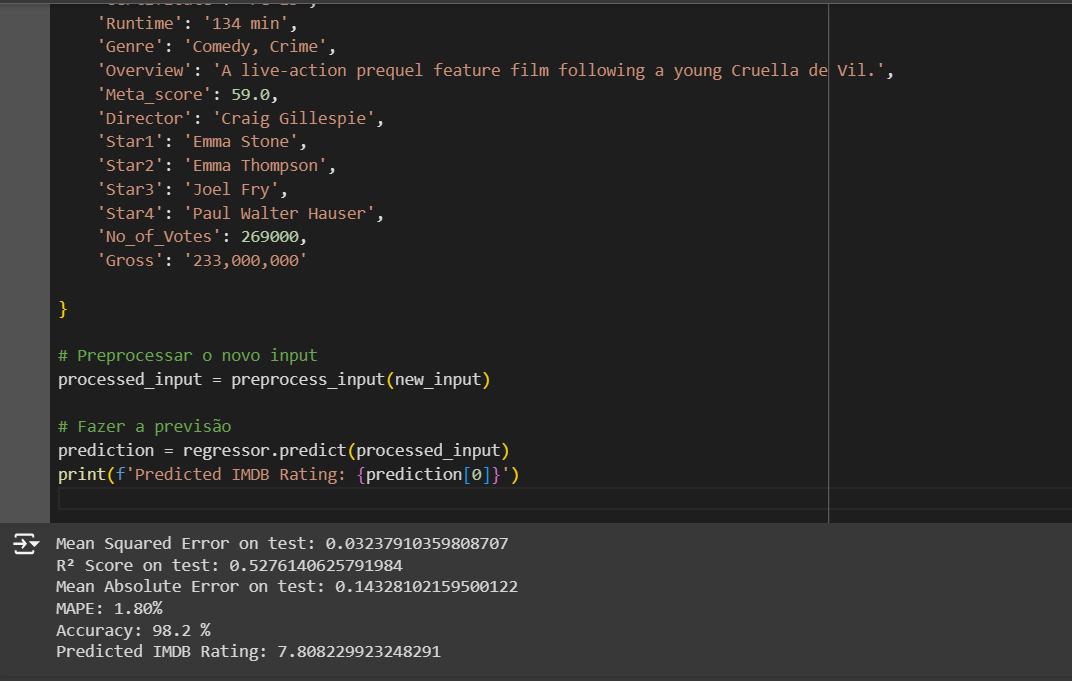

In [91]:
# Resposta a pergunta 2) A- Qual filme seria recomendado para uma pessoa que não conheço
def recommend_popular_movies(df, top_n=10):
    # Filtrar filmes para todos os públicos
    suitable_certificates = ['U', 'G', 'PG', 'Passed', 'Approved']
    family_friendly_movies = df[df['Certificate'].isin(suitable_certificates)]

    # Ordenar filmes por popularidade
    popular_movies = family_friendly_movies.sort_values(by='No_of_Votes', ascending=False).head(top_n)
    return popular_movies[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Genre', 'Certificate']]

# Recomendação de filmes populares para todos os públicos
top_movies = recommend_popular_movies(df, top_n=10)
print("Top 10 Filmes Recomendados para Todos os Públicos:")
print(top_movies)



Top 10 Filmes Recomendados para Todos os Públicos:
                                          Series_Title  IMDB_Rating  \
9    The Lord of the Rings: The Fellowship of the Ring          8.8   
4        The Lord of the Rings: The Return of the King          8.9   
35                                        The Prestige          8.5   
46                                  Back to the Future          8.5   
65                                              WALL·E          8.4   
43                          Terminator 2: Judgment Day          8.5   
108         Star Wars: Episode VI - Return of the Jedi          8.3   
241                                       Finding Nemo          8.1   
42                                       The Lion King          8.5   
249                                    The Truman Show          8.1   

     No_of_Votes                         Genre Certificate  
9        1661481      Action, Adventure, Drama           U  
4        1642758      Action, Adventure, Dram

Já que a recomendação é para uma pessoa desconhecida devemos analisar com cautela pois além da popularidade do filme baseado na nota do IMDB com a quantidade de votos, devemos fazer uma filtragem para que o filme tenha classificação indicativa para todo o público já que não sabemos a idade da pessoa.

#2- Reponder as seguintes perguntas:

##A- Qual filme seria recomendado para uma pessoa que não conheço
   
   The Lord of the Rings: The Fellowship of the Ring
  
##B- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme ?

Baseado no dataset do IMDB os principais fatores são:

Número de votos, Ano de lançamento, se o filme foi dirigido pelo diretor Christopher Nolan, Se o ator Elijah Wood atuou, Tempo de duração do filme e se o ator Mark Hamill atuou no filme.

Basedo na combinação com os data sets do oscar temos outros fatores como:

Quantidade de indicações do filme ao oscar, quantidade de oscars ganho pelo filme, se o ator/atriz ou diretor/diretoras já foram premiados pelo oscar anteriormente

##C- Quais insights podem ser tirados com a coluna Overview? é possível inferir o gênero do filme a partir dela?

Sim nós temos algumas correlações por exemplo, filmes do Gênero "Crime" possuem palavras como young,murder,crime,family com frequência. Já filmes do gênero "Action": must, man, world, former. Filmes de Biografia: story, life, war. Comédia tem friends com frequência  já drama tem love e woman.

Acesse a nuvem de palavras completa.

#3- Fazer a previsão da nota do IMDB a partir dos dados

##A- Quais variáveis e transformações foram utilizadas

Foram utilizadas as variáveis numéricas (Faturamento, número de votos,  duração do filme, ano de lançamento, média ponderada das críticas) Foi combinado com dois data sets de filmes, atores/atrizes, diretores/diretoras ganhadores do ocars e foram utilizado as variáveis (Quantidade de oscars ganho pelo filme, quantidade de indicações, se alguém do elenco já havia ganhado algum oscar)

##B- Qual tipo de problema está sendo resolvido

Um problema de regressão onde queremos prever um valor contínuo (Nota do IMDB)

##C- Qual modelo melhor se aproximou dos dados, prós e contras?

O modelo que mais se aproximou dos dados foi o regressor da biblioteca XGBoost. Esse modelo foi treinado com 9 features no eixo X e nosso alvo (IMDB_Rating) no eixo Y.

As features foram: Oscars_Ganhos, Indicacoes_Oscar, movie_oscar_winner, previous_oscar_winner, Released_Year, Runtime, Meta_score, No_of_Votes, Gross.

Prós:
Maior acurácia: Leva em conta se o elenco e o filme já ganharam o Oscar, o que pode ser um forte indicador de qualidade.
Capacidade de lidar com dados complexos: XGBoost pode capturar relações não lineares entre as features e a variável alvo, resultando em melhores previsões.
Eficiência computacional: XGBoost é altamente otimizado para velocidade e desempenho, utilizando técnicas de paralelismo e processamento distribuído.

Contras:
Necessidade de atualizações constantes: O dataset com os ganhadores do Oscar precisa ser atualizado regularmente. Filmes recentes que ainda não foram atualizados na lista do Oscar podem afetar o desempenho do modelo.
Complexidade do modelo: XGBoost pode ser mais difícil de interpretar em comparação com modelos mais simples, o que pode dificultar a compreensão dos fatores que influenciam as previsões.
Dependência de tuning de hiperparâmetros: A eficácia do XGBoost pode depender significativamente da escolha de hiperparâmetros, o que requer tempo e recursos para otimização adequada.

##D- Qual medida de performance foi escolhida

A medida de performance escolhida foi a Acurácia, calculada pela subtração da porcentagem da Média Absoluta do Erro (MAPE) da perfeição (100%) e o R² Score.

Acurácia: Indicador que mostra o quão próximo o modelo está das previsões corretas. Uma acurácia alta significa que o modelo tem um bom desempenho geral.
MAPE (Mean Absolute Percentage Error): Mede a precisão do modelo, expressando o erro absoluto médio como uma porcentagem das observações reais. É útil por ser uma métrica intuitiva e fácil de interpretar.
R² Score: Avalia a proporção da variabilidade total dos dados explicada pelo modelo. Um R² próximo de 1 indica um modelo que explica bem a variabilidade dos dados, enquanto um valor próximo de 0 indica o contrário.


Agora vamos serializar nosso modelo em formato .pkl para poder ser carregado e utlizado em outro notebook retratando de forma fiel o nosso modelo

In [92]:


# Modelo escolhido

# Separar as features e o alvo
X = df_categorics_num_oscar.drop(['IMDB_Rating'], axis=1)
y = df_categorics_num_oscar['IMDB_Rating']

# Melhores parâmetros avaliados com grid search
params = {
    'objective': 'reg:squarederror',
    'subsample': 0.5,
    'reg_lambda': 1.0,
    'reg_alpha': 0.01,
    'n_estimators': 100,
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.1,
    'colsample_bytree': 1.0
}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Serializar o modelo em um arquivo .pkl
filename = 'xgb_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

# Agora você pode carregar o modelo serializado usando pickle.load()
# Exemplo de carregamento do modelo:
# loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
'''
# Salvar o modelo em um arquivo .pkl
with open('imdb_rating_predictor.pkl', 'wb') as f:
    pickle.dump(regressor, f)

# Função para preprocessar o novo input
def preprocess_input(input_data):
    input_df = pd.DataFrame([input_data])

    # Converter para minúsculas
    input_df['Series_Title'] = input_df['Series_Title'].str.lower()
    input_df['Director'] = input_df['Director'].str.lower()
    input_df['Star1'] = input_df['Star1'].str.lower()
    input_df['Star2'] = input_df['Star2'].str.lower()
    input_df['Star3'] = input_df['Star3'].str.lower()
    input_df['Star4'] = input_df['Star4'].str.lower()

    # Extrair o valor numérico de Runtime e converter para int
    input_df['Runtime'] = input_df['Runtime'].str.replace(' min', '').astype(int)

    # Remover vírgulas de Gross e converter para float
    input_df['Gross'] = input_df['Gross'].str.replace(',', '').astype(float)

    input_df['Released_Year'] = input_df['Released_Year'].astype(int)

    certificate_map = {
    'U': 1, 'A': 2, 'UA': 3, 'R': 4, 'PG-13': 5, 'PG': 6, 'Passed': 7, 'G': 8,
    'Approved': 9, 'TV-PG': 10, 'GP': 11, 'TV-14': 12, '16': 13, 'TV-MA': 14,
    'Unrated': 15, 'U/A': 16,
    'u': 335, 'a': 196, 'ua': 175, 'r': 146, 'pg-13': 43, 'pg': 37, 'passed': 34,
    'g': 12, 'approved': 11, 'tv-pg': 3, 'gp': 2, 'tv-14': 1, '16': 1, 'tv-ma': 1,
    'unrated': 1, 'u/a': 1
}
    input_df['Certificate'] = input_df['Certificate'].map(certificate_map)

    # Verificar se o diretor e estrelas são vencedores do Oscar
    oscar_status = check_oscar_winners(input_df['Director'].values[0],
                                       [input_df['Star1'].values[0], input_df['Star2'].values[0],
                                        input_df['Star3'].values[0], input_df['Star4'].values[0]])
    print(oscar_status)
    for key, value in oscar_status.items():
        input_df[key] = value

    # Verificar se o título do filme está na lista de filmes que ganharam o Oscar
    #input_df['movie_oscar_winner'] = (input_df['Series_Title'].isin(oscar_winner_titles)).astype(int)
    # Verificar se o Series_Title está na lista de títulos de filmes vencedores do Oscar
    input_df['movie_oscar_winner'] = input_df['Series_Title'].isin(df_new_categorical_oscars.loc[df_new_categorical_oscars['movie_oscar_winner'] == 1, 'Series_Title_Normalizado']).astype(int)

    # Adicionar a coluna previous_oscar_winner com base nos resultados da verificação
    input_df['previous_oscar_winner'] = any(list(oscar_status.values()))

    # Assegurar que todas as colunas necessárias estão presentes e preencher com 0 se não estiverem
    for column in X.columns:
        if column not in input_df:
            input_df[column] = 0

    input_df = input_df[X.columns]
    print("Processed Input:")
    print(input_df)
    return scaler.transform(input_df)

# Salvar o preprocessador em um arquivo .pkl
with open('preprocess_input.pkl', 'wb') as f:
    pickle.dump(preprocess_input, f)

 '''

In [94]:
#Serialização com pkl

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

# Supõe-se que df_categorics_num_oscar já está definido anteriormente
# Separar as features e o alvo
X = df_categorics_num_oscar.drop(['IMDB_Rating'], axis=1)
y = df_categorics_num_oscar['IMDB_Rating']

# Melhores parâmetros avaliados com grid search
params = {
    'objective': 'reg:squarederror',
    'subsample': 0.5,
    'reg_lambda': 1.0,
    'reg_alpha': 0.01,
    'n_estimators': 100,
    'max_depth': 9,
    'learning_rate': 0.05,
    'gamma': 0.1,
    'colsample_bytree': 1.0
}

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo XGBRegressor
regressor = xgb.XGBRegressor(**params)

# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

errors = abs(y_pred - y_test)

# Calculando o MAPE
mape = 100 * (errors / y_test)
mean_mape = np.mean(mape)
print(f'MAPE: {mean_mape:.2f}%')

# Calculando a acurácia
accuracy = 100 - mean_mape
print('Accuracy:', round(accuracy, 2), '%')

# Serializar o scaler, o modelo e as colunas do conjunto de treinamento
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('regressor.pkl', 'wb') as f:
    pickle.dump(regressor, f)

# Serializar as colunas do conjunto de treinamento
with open('X_columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

# Serializar os vencedores do Oscar, se necessário
with open('oscar_winners.pkl', 'wb') as f:
    pickle.dump(oscar_winner_names, f)

print("Model, scaler, training columns, and Oscar winners serialized successfully.")


Mean Squared Error: 0.03210785932190307
R² Score: 0.5315713055982045
Mean Absolute Error: 0.14130054235458378
MAPE: 1.77%
Accuracy: 98.23 %
Model, scaler, training columns, and Oscar winners serialized successfully.


In [95]:
import cloudpickle as pickle


def check_oscar_winners(director, stars):
    oscar_status = {
        'Director_Won_Oscar': 0,
        'Star1_Won_Oscar': 0,
        'Star2_Won_Oscar': 0,
        'Star3_Won_Oscar': 0,
        'Star4_Won_Oscar': 0
    }

    if director.lower() in oscar_winner_names:
        oscar_status['Director_Won_Oscar'] = 1
    for i, star in enumerate(stars):
        if star.lower() in oscar_winner_names:
            oscar_status[f'Star{i+1}_Won_Oscar'] = 1

    return oscar_status

# Função para fazer a previsão de um novo input
def preprocess_input(input_data, scaler, X_columns, oscar_winner_names):
    input_df = pd.DataFrame([input_data])

    # Converter para minúsculas
    input_df['Series_Title'] = input_df['Series_Title'].str.lower()
    input_df['Director'] = input_df['Director'].str.lower()
    input_df['Star1'] = input_df['Star1'].str.lower()
    input_df['Star2'] = input_df['Star2'].str.lower()
    input_df['Star3'] = input_df['Star3'].str.lower()
    input_df['Star4'] = input_df['Star4'].str.lower()

    #  transformações conjunto de treinamento
    input_df['Gross'] = input_df['Gross'].str.replace(',', '').astype(float)
    input_df['Runtime'] = input_df['Runtime'].str.replace(' min', '').astype(int)
    input_df['Meta_score'] = input_df['Meta_score'].astype(float)
    input_df['Released_Year'] = input_df['Released_Year'].astype(int)

    # Verificar se o diretor e estrelas são vencedores do Oscar
    oscar_status = check_oscar_winners(input_df['Director'].values[0],
                                       [input_df['Star1'].values[0], input_df['Star2'].values[0],
                                        input_df['Star3'].values[0], input_df['Star4'].values[0]])
    for key, value in oscar_status.items():
        input_df[key] = value


    for column in X_columns:
        if column not in input_df:
            input_df[column] = 0

    input_df = input_df[X_columns]

    return scaler.transform(input_df)

# Serializar as funções
with open('check_oscar_winners.pkl', 'wb') as f:
    pickle.dump(check_oscar_winners, f)

with open('preprocess_input.pkl', 'wb') as f:
    pickle.dump(preprocess_input, f)

print("Functions serialized successfully.")


Functions serialized successfully.


In [96]:
# Lista das bibliotecas que você deseja verificar
libraries = ['pandas', 'numpy', 'matplotlib.pyplot', 'seaborn', 'missingno',
    'scipy.stats.skew', 'scipy.stats.kurtosis', 're', 'nltk',
    'nltk.corpus.stopwords', 'nltk.tokenize.word_tokenize', 'WordCloud',
    'collections.defaultdict', 'string', 'sklearn.model_selection.train_test_split',
    'sklearn.model_selection.RandomizedSearchCV', 'sklearn.metrics.mean_squared_error',
    'sklearn.metrics.r2_score', 'sklearn.metrics.mean_absolute_error',
    'sklearn.preprocessing.StandardScaler', 'sklearn.feature_selection.SelectKBest',
    'sklearn.feature_selection.f_regression', 'xgboost', 'pickle', 'importlib']

# Função para obter a versão de cada biblioteca
def get_library_version(library_name):
    try:
        module = importlib.import_module(library_name)
        if library_name == 'matplotlib':
            import matplotlib
            return matplotlib.__version__
        elif library_name == 'scipy':
            import scipy
            return scipy.__version__
        elif library_name == 'nltk':
            import nltk
            return nltk.__version__
        elif library_name == 'wordcloud':
            from wordcloud import __version__
            return __version__
        elif library_name == 'sklearn':
            import sklearn
            return sklearn.__version__
        elif library_name == 'xgboost':
            import xgboost
            return xgboost.__version__
        else:
            return None
    except ImportError:
        return None

# Gerar lista de requisitos com as versões
requirements = []
for lib in libraries:
    version = get_library_version(lib)
    if version:
        requirements.append(f"{lib}=={version}")
    else:
        requirements.append(lib)

# Salvar as bibliotecas e versões em um arquivo requirements.txt
with open('requirements.txt', 'w') as file:
    for requirement in requirements:
        file.write(requirement + '\n')

print("Arquivo requirements.txt gerado com sucesso!")



Arquivo requirements.txt gerado com sucesso!
